In [290]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [186]:
df = pd.read_csv('bank-full.csv')
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [187]:
df.shape

(45211, 17)

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [189]:
df.apply(pd.isnull).sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64

In [190]:
df.duplicated().sum()

0

In [191]:
df['term deposite'] = df['y']
df.drop(columns = ['y'], axis = 1, inplace = True)
df.head()

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome  \
0  unknown    5   may       261         1     -1         0  unknown   
1  unknown    5   may       151         1     -1         0  unknown   
2  unknown    5   may        76         1     -1         0  unknown   
3  unknown    5   may        92         1     -1         0  unknown   
4  unknown    5   may       198         1     -1         0  unknown   

  term deposite  
0            no  
1            no  
2            no  
3            no  
4            no

In [192]:
df['term deposite'].value_counts()

term deposite
no     39922
yes     5289
Name: count, dtype: int64

In [193]:
df.describe()

age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.000000  
max      871.000000    275.000000

In [194]:
categorical_columns, numerical_columns = [], []
for column in df.columns:
    if df[column].dtype == 'object':
        categorical_columns.append(column)
    else:
        numerical_columns.append(column)

In [195]:
categorical_columns

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'term deposite']

In [196]:
numerical_columns

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [197]:
data = df.copy()

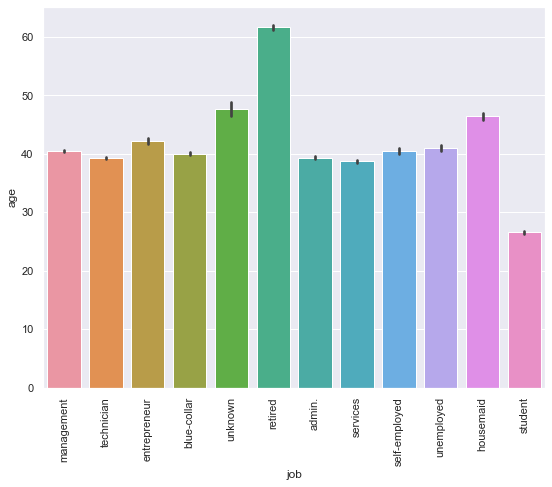

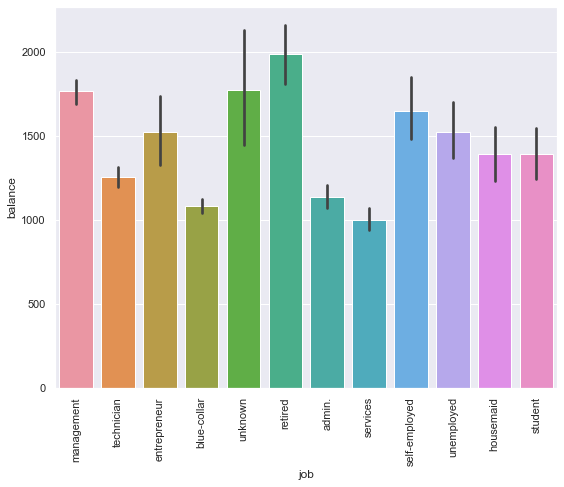

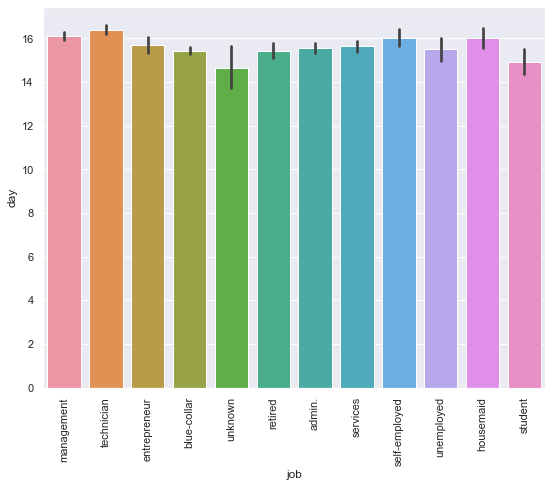

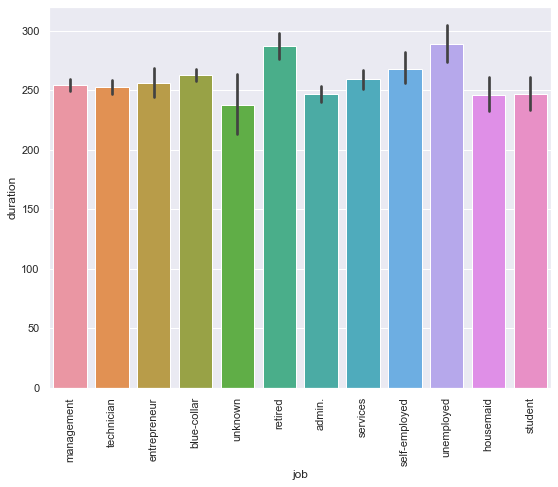

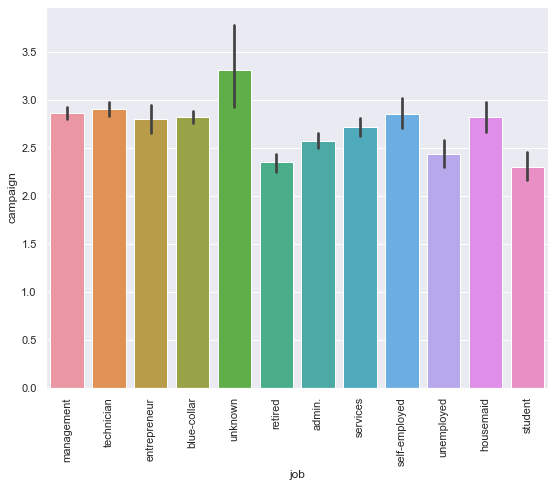

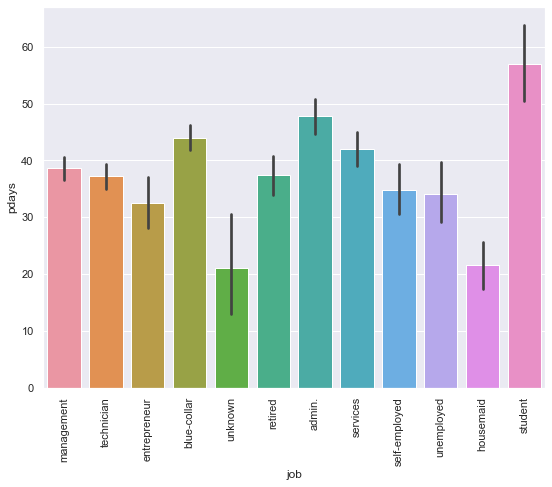

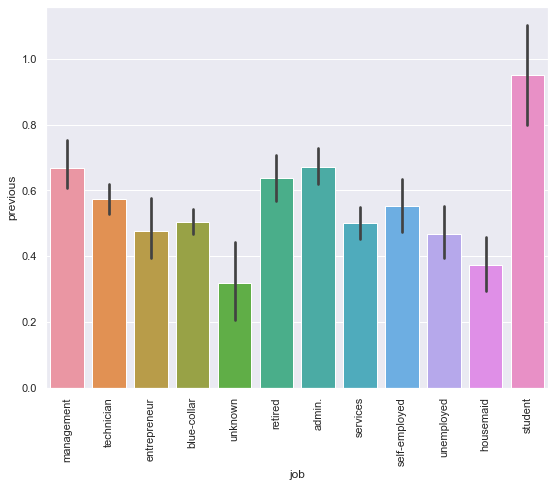

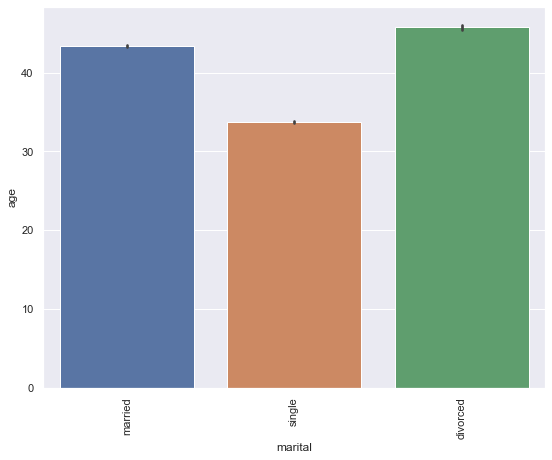

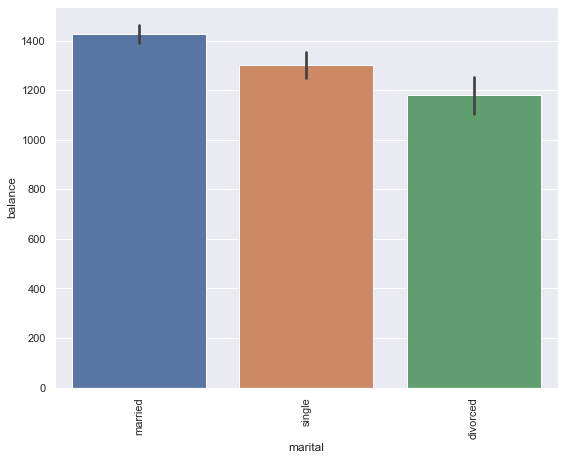

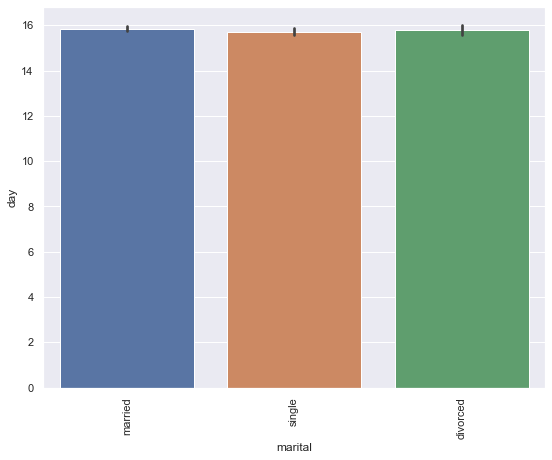

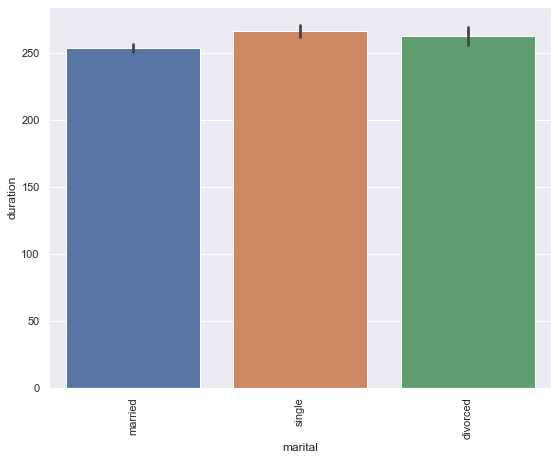

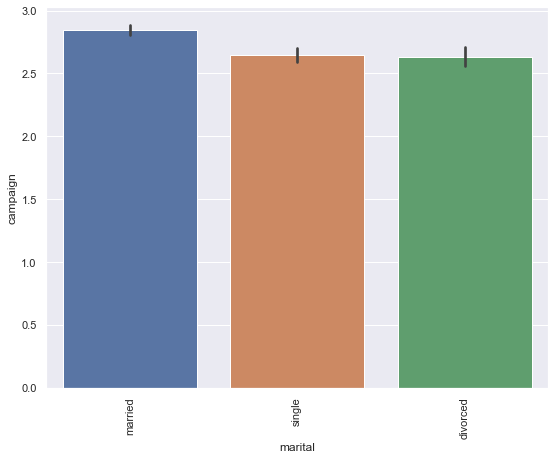

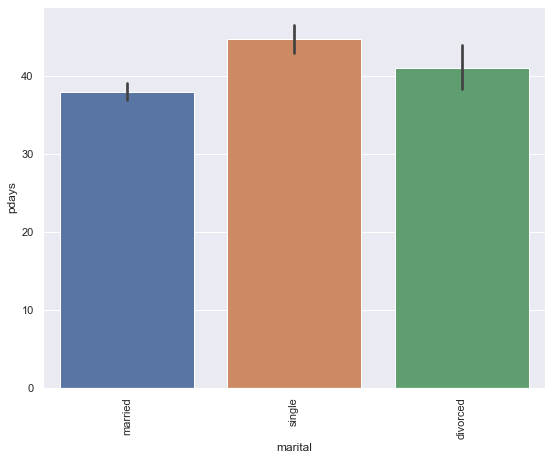

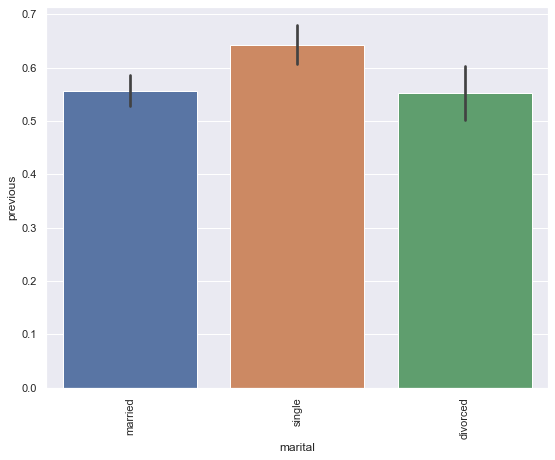

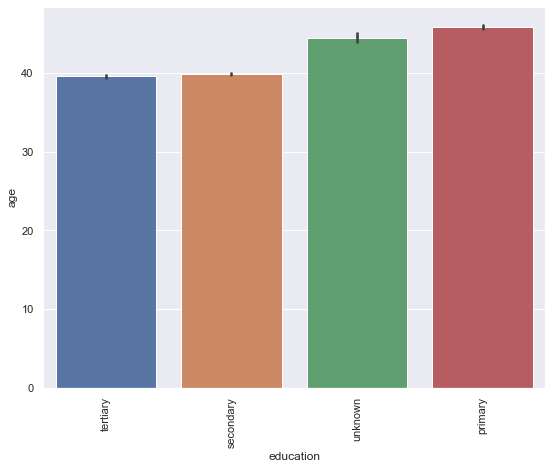

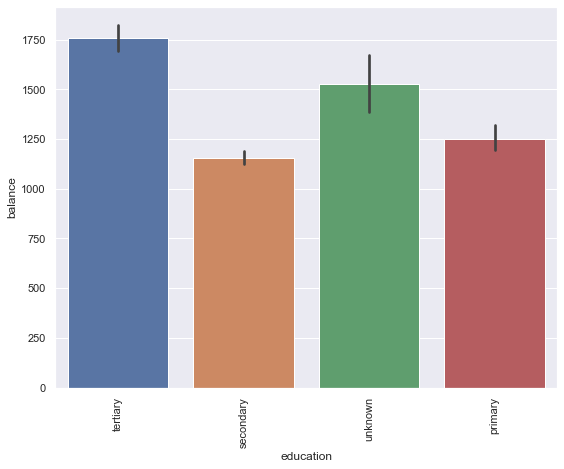

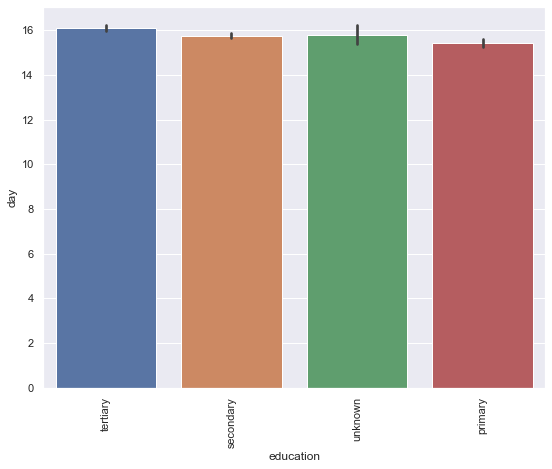

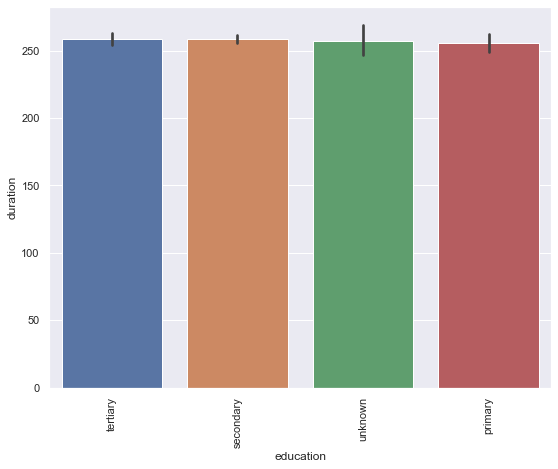

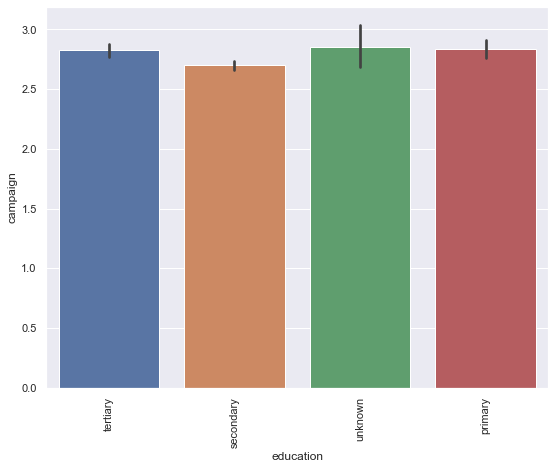

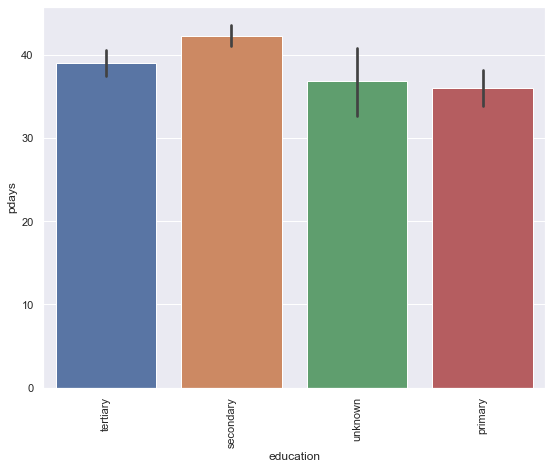

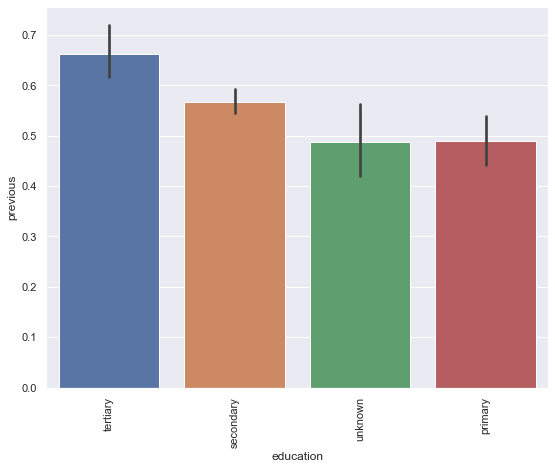

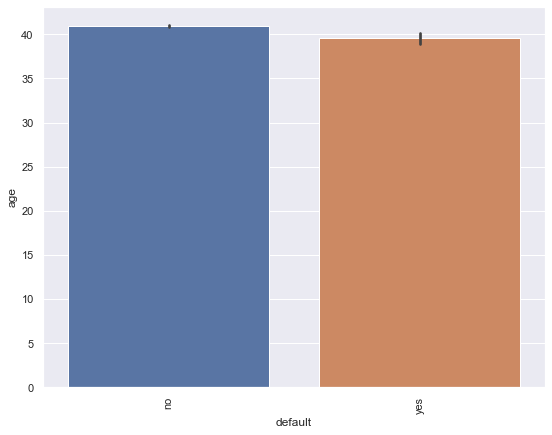

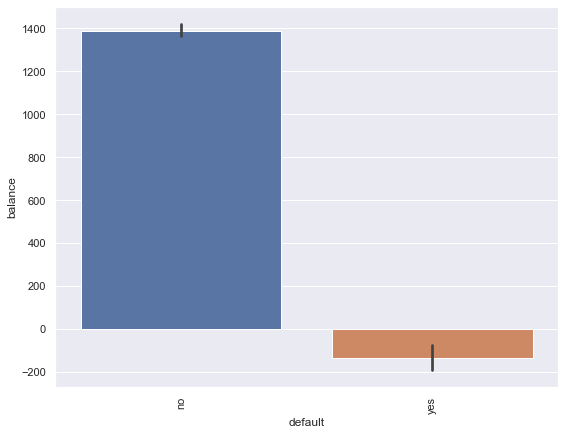

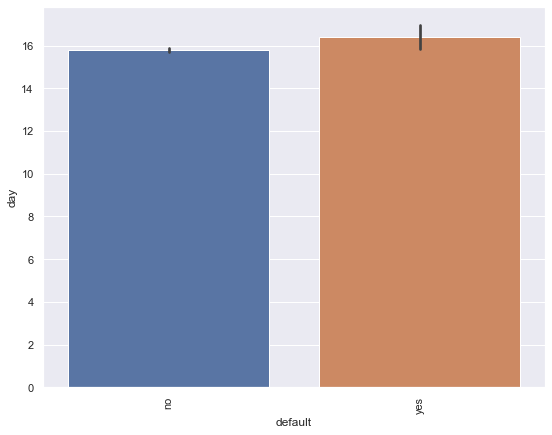

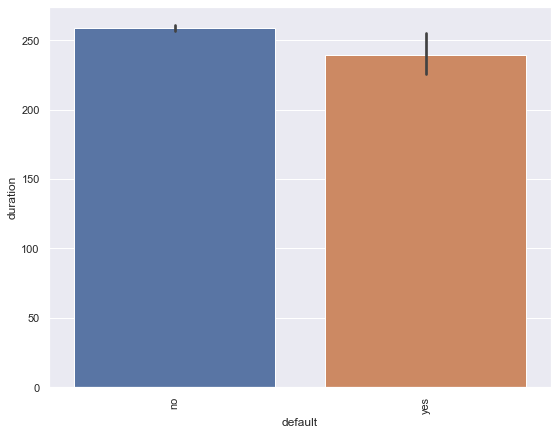

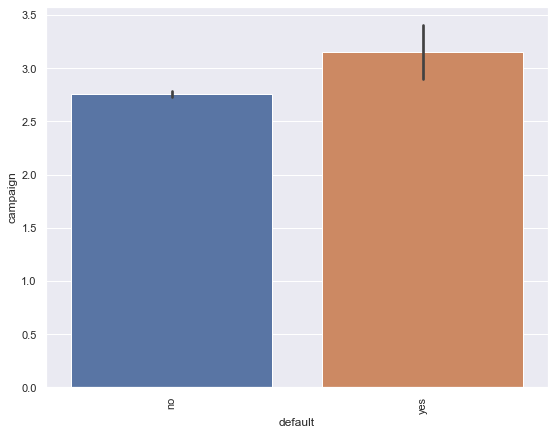

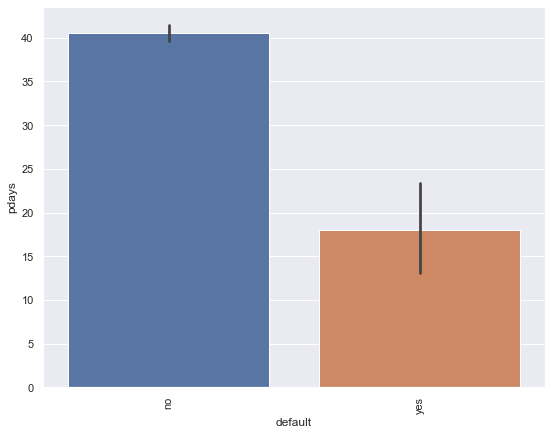

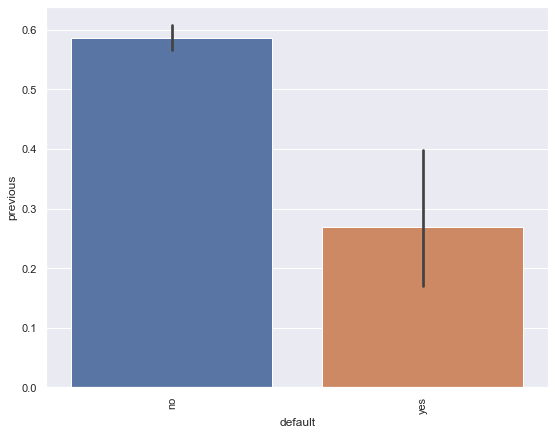

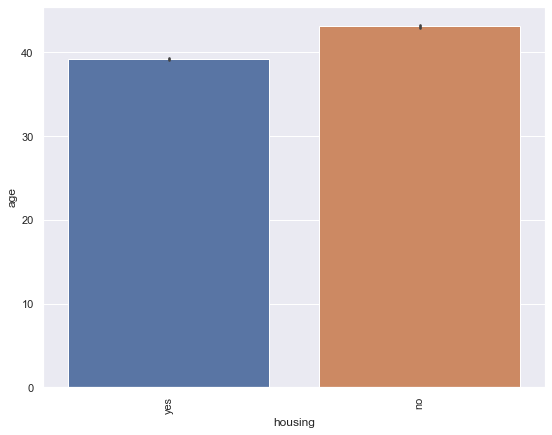

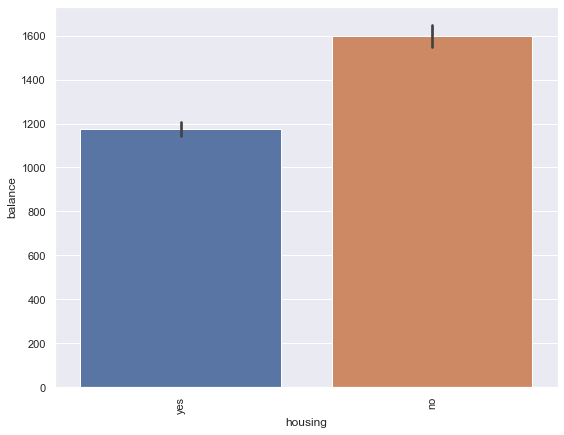

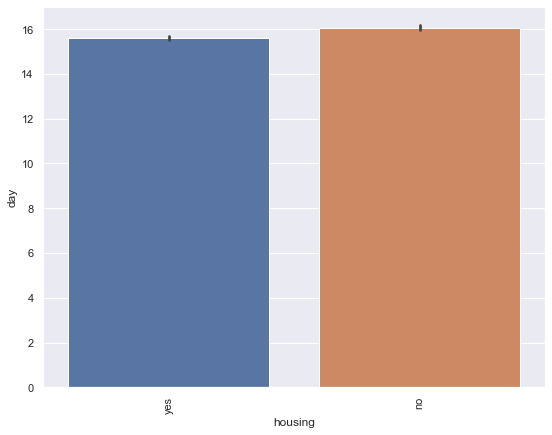

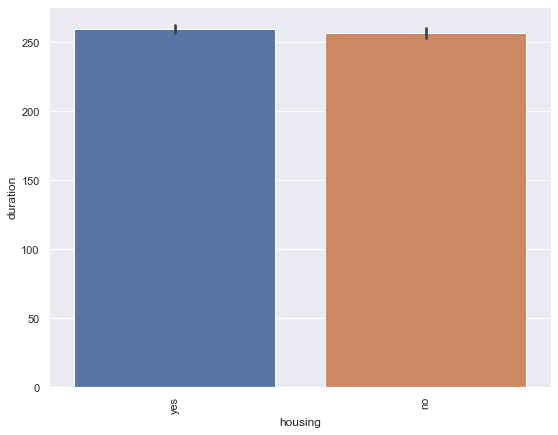

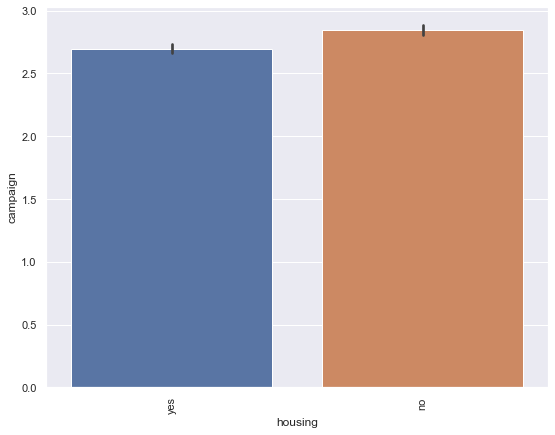

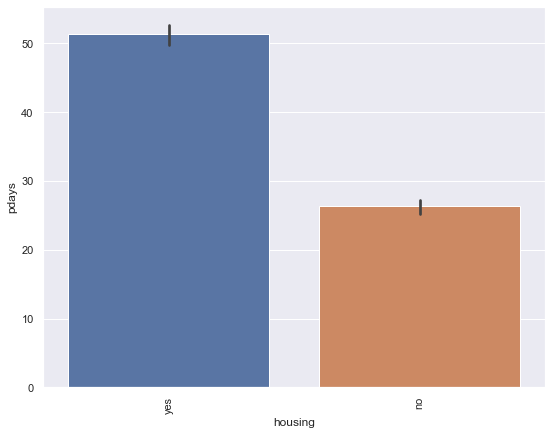

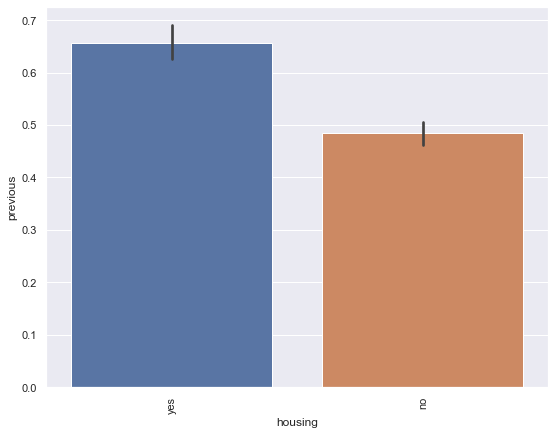

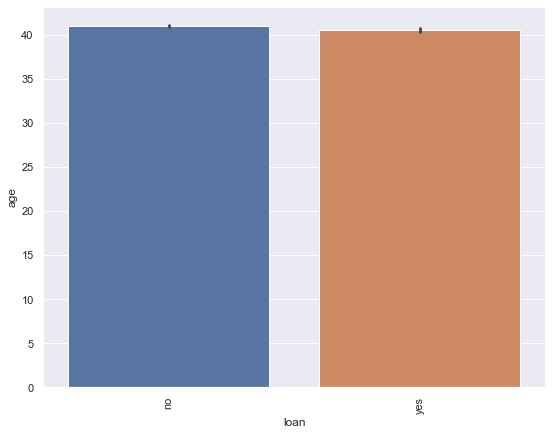

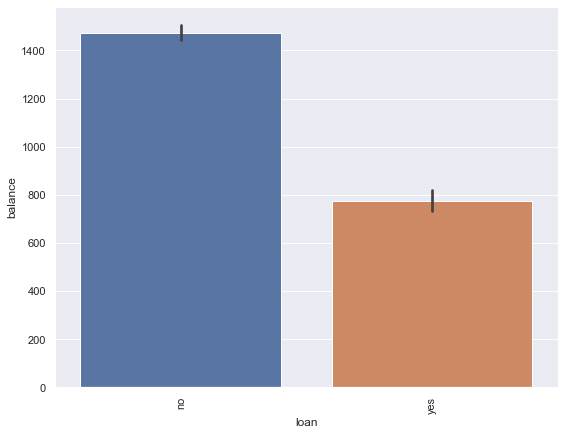

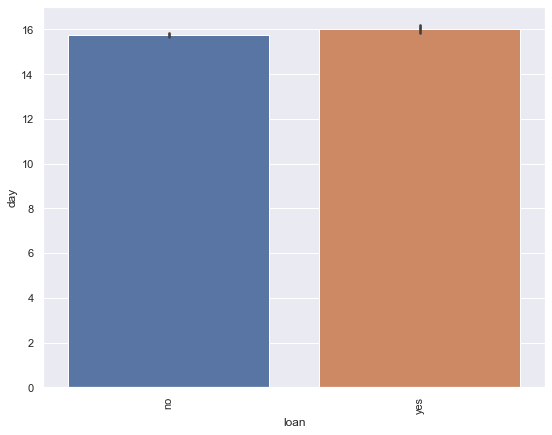

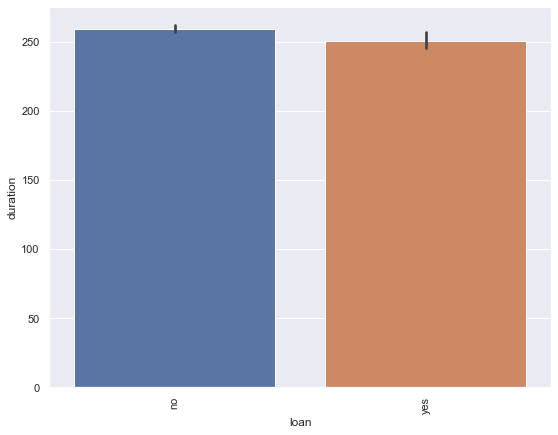

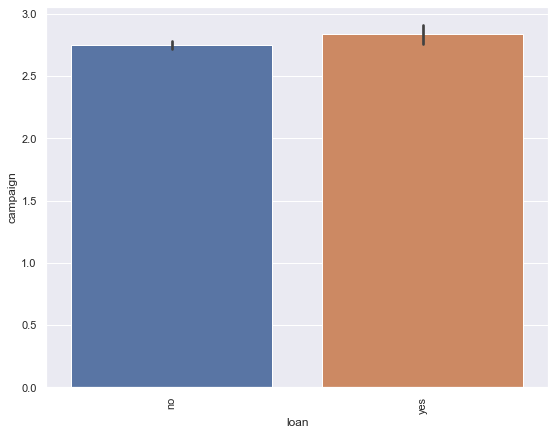

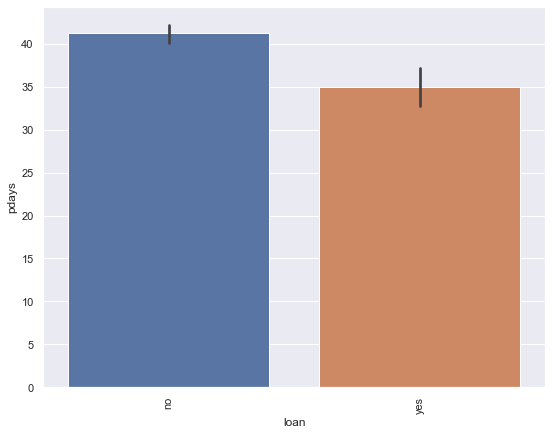

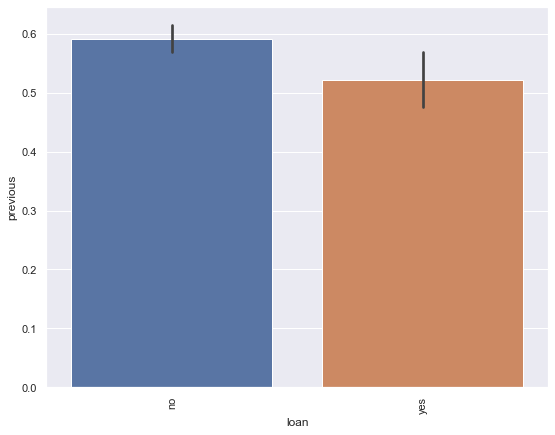

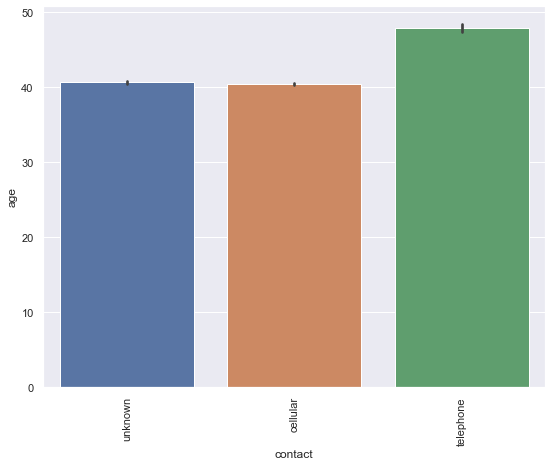

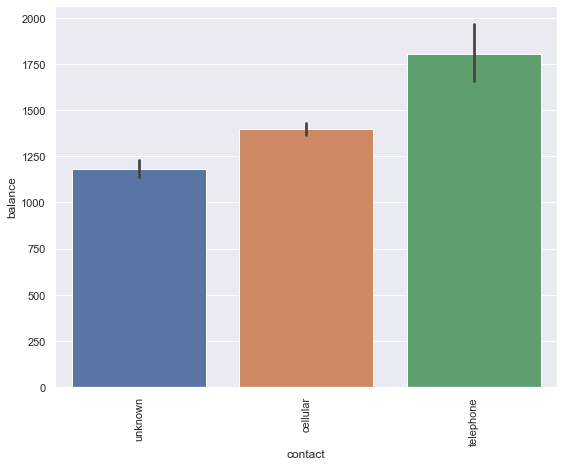

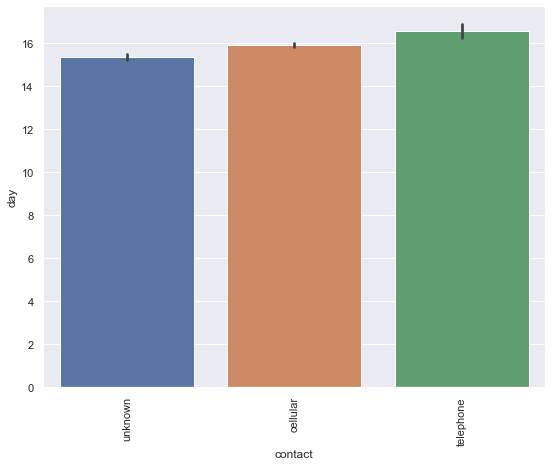

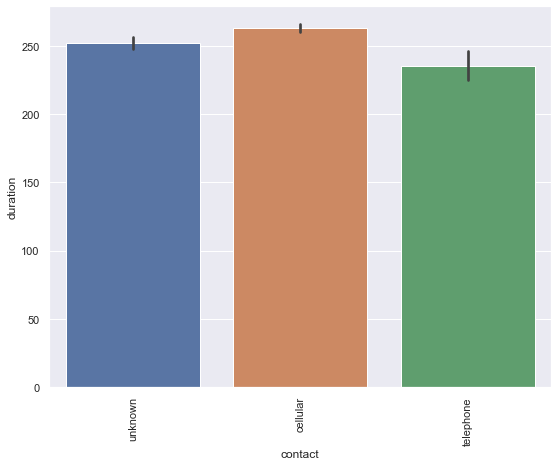

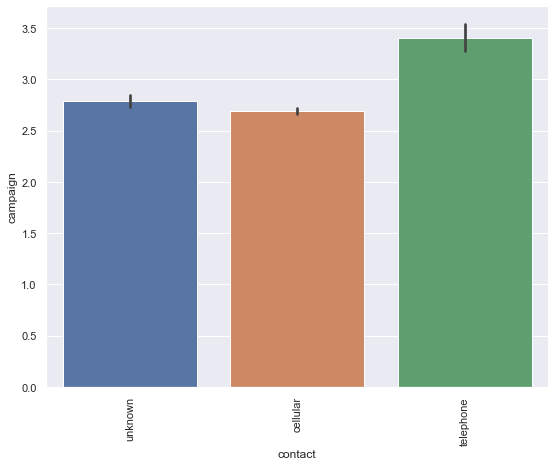

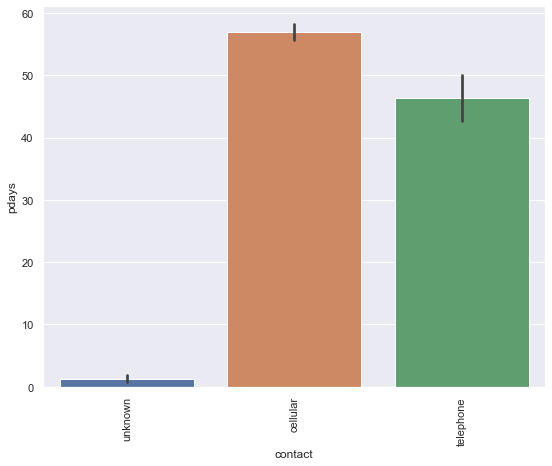

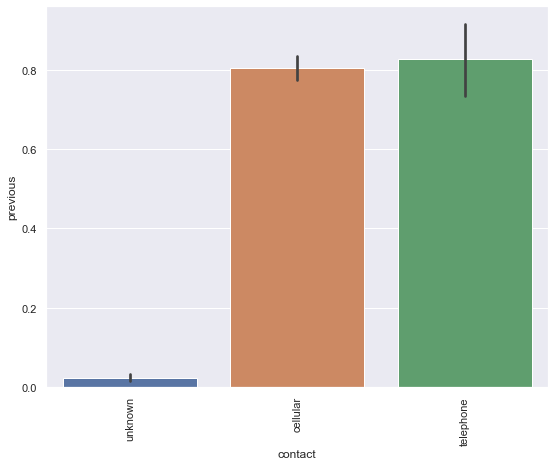

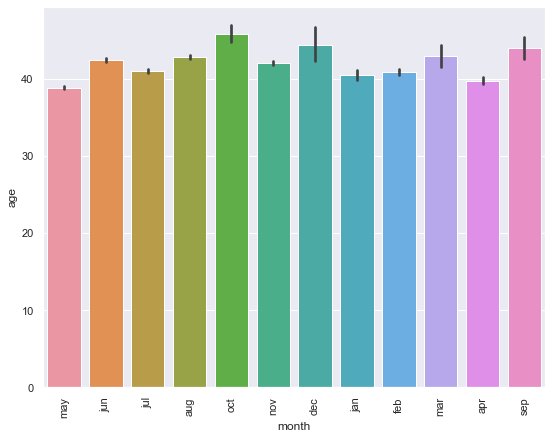

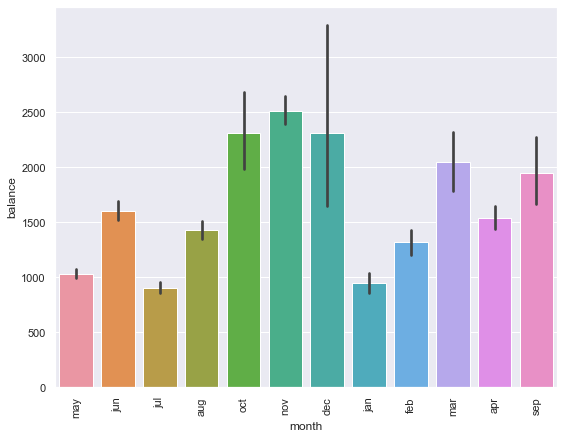

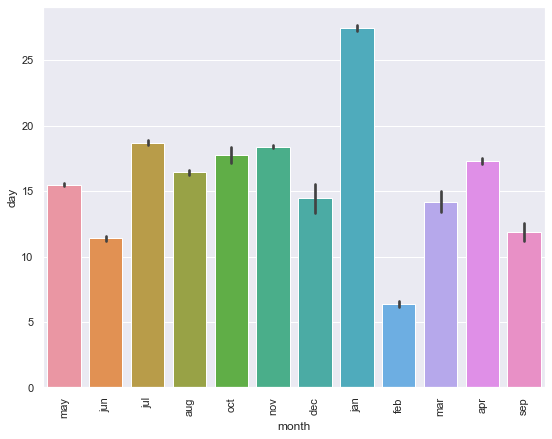

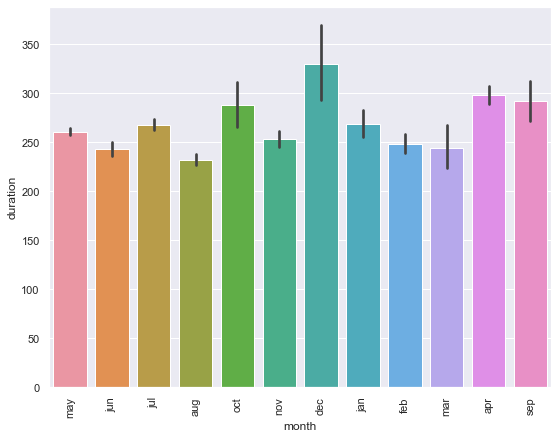

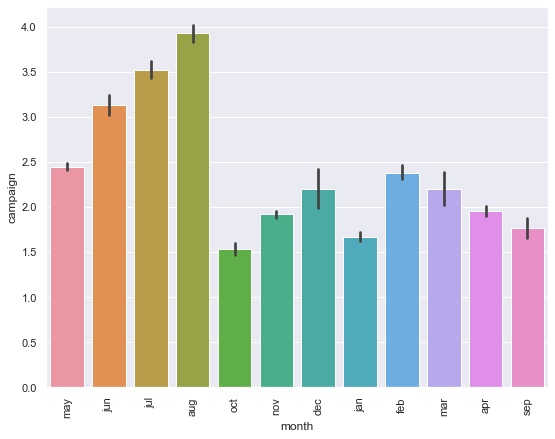

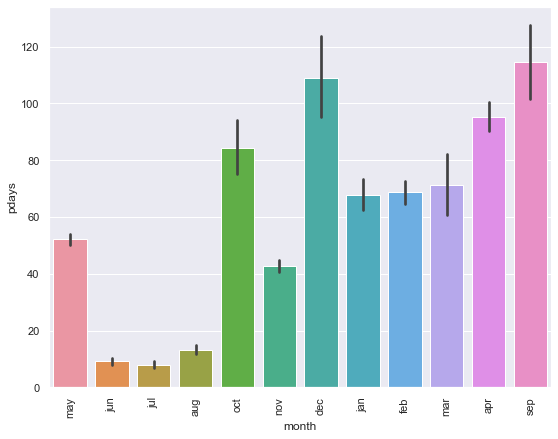

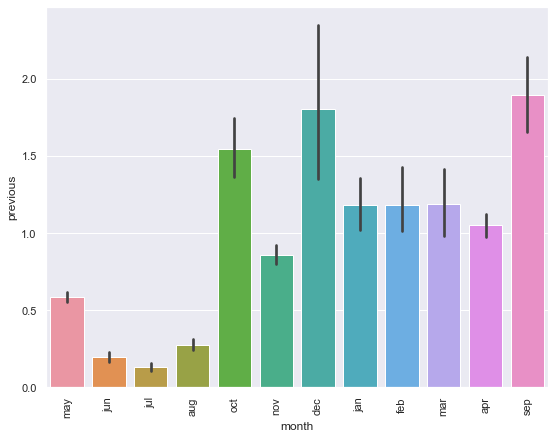

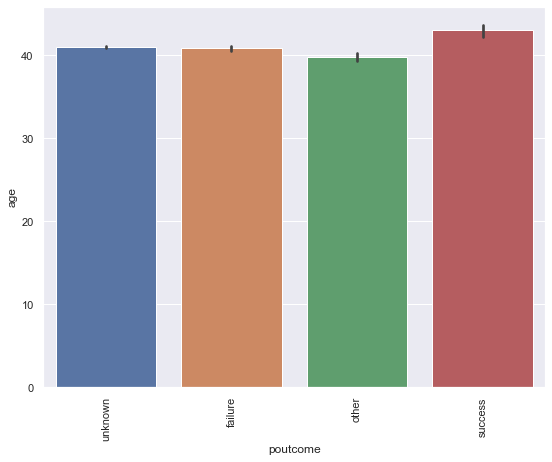

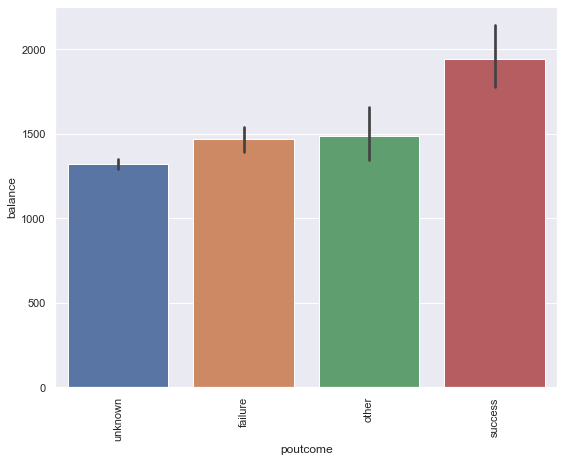

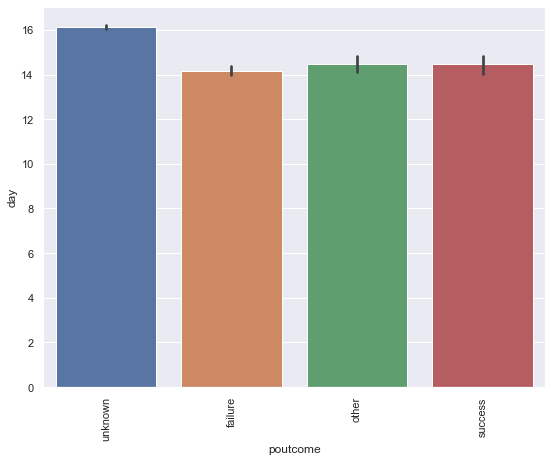

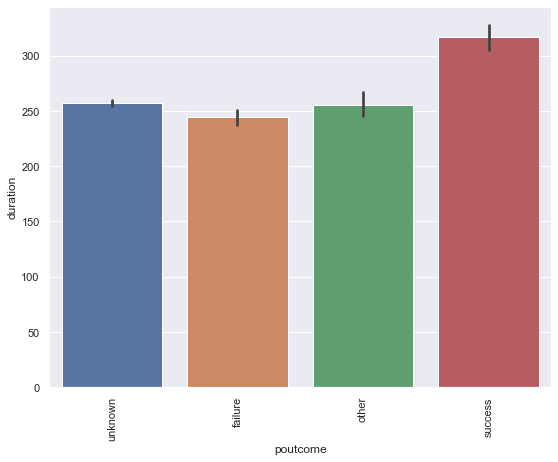

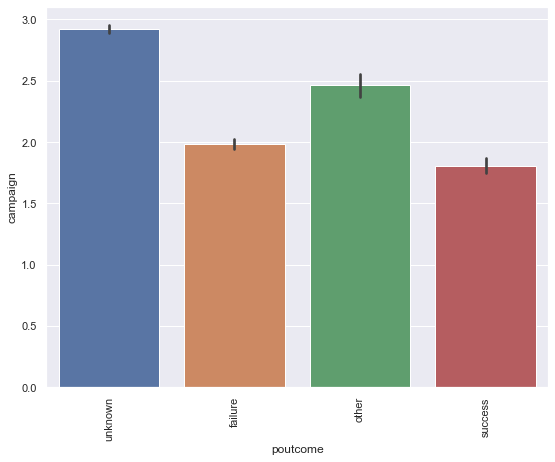

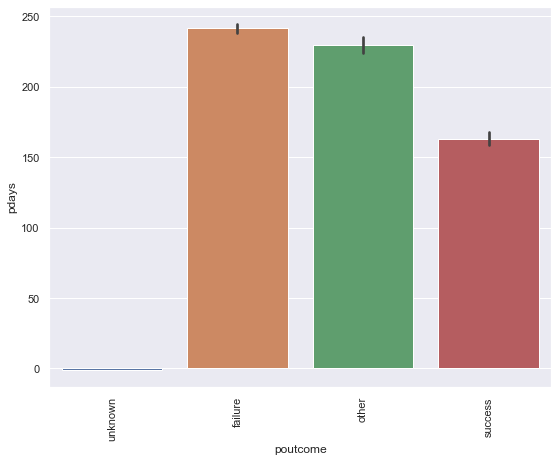

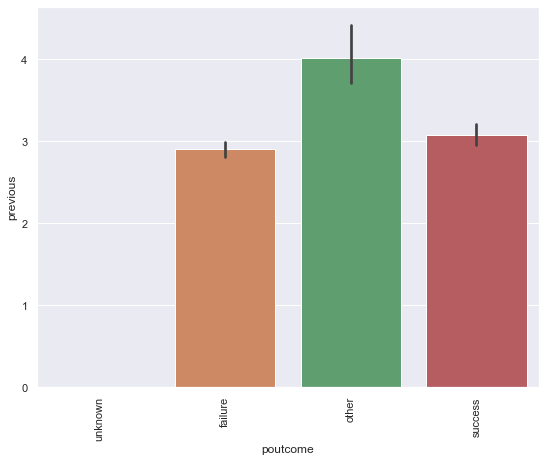

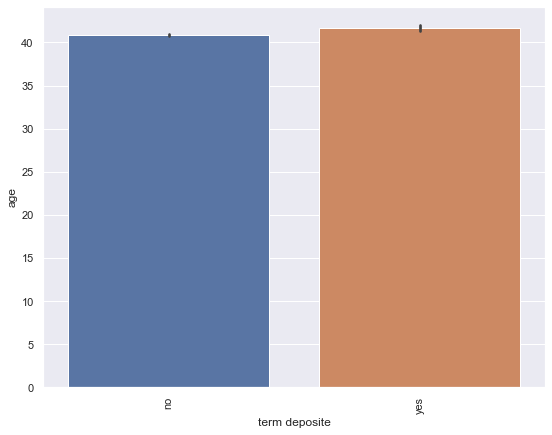

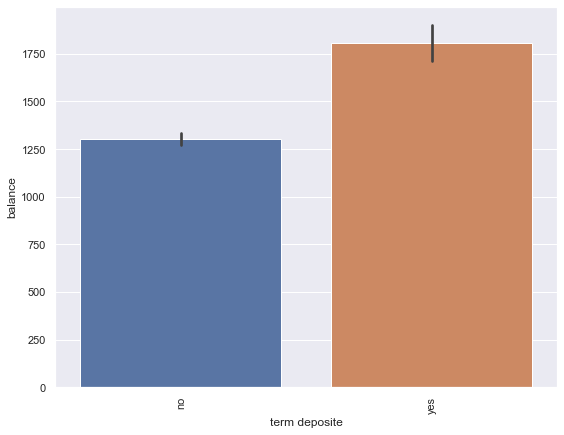

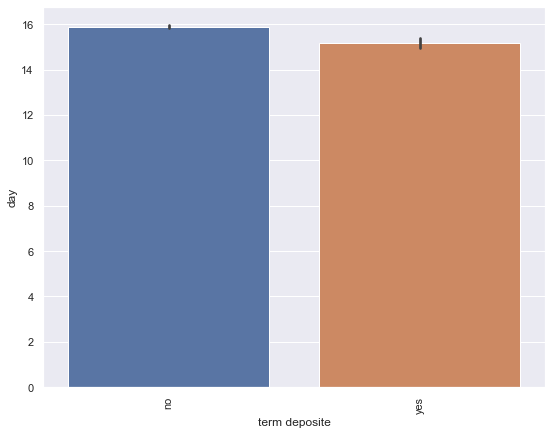

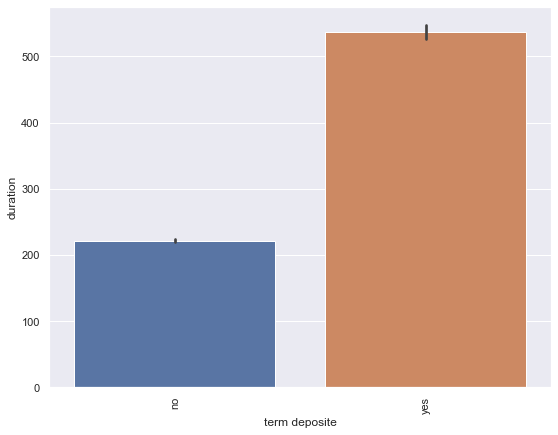

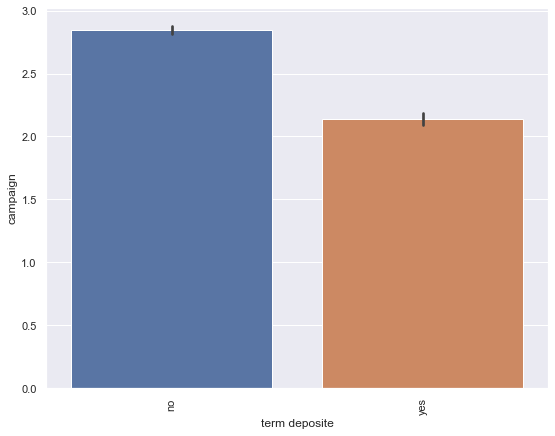

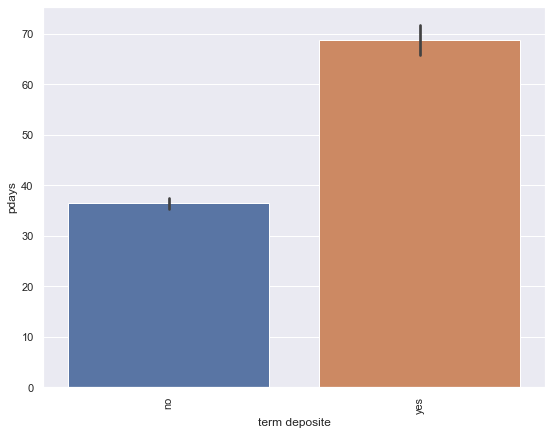

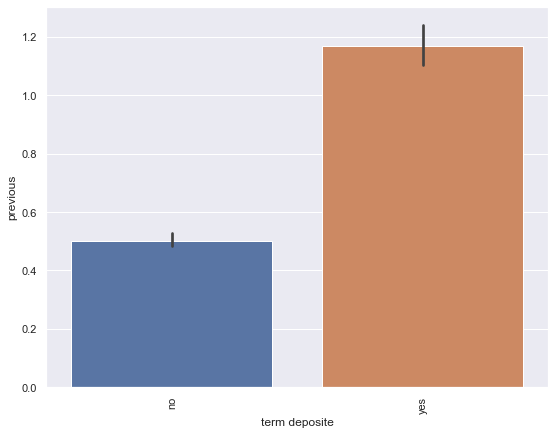

In [198]:
for i in categorical_columns:
    for j in numerical_columns:
        plt.figure(figsize = (9, 7))
        sns.barplot(data = data, x = i, y = j)
        plt.xticks(rotation = 90)
        plt.show()

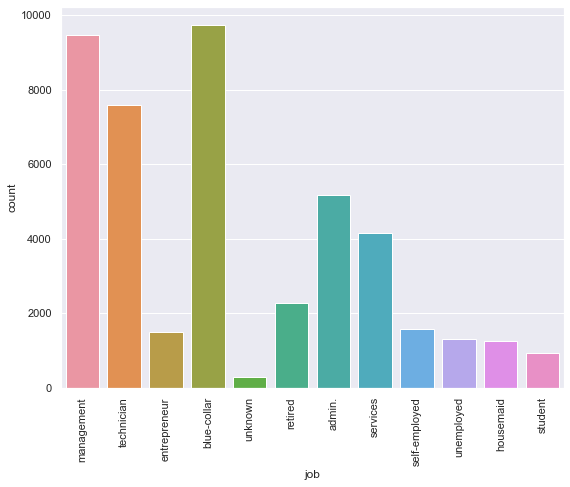

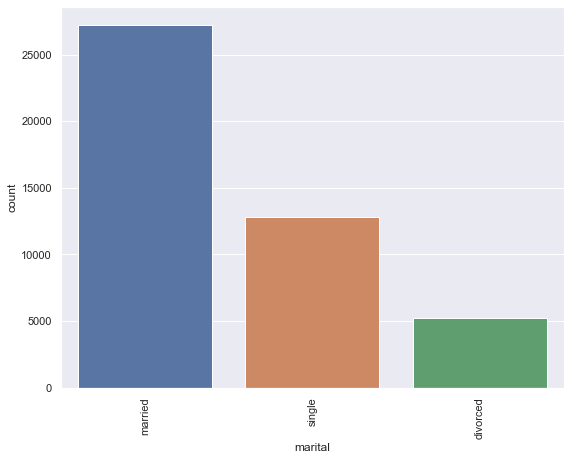

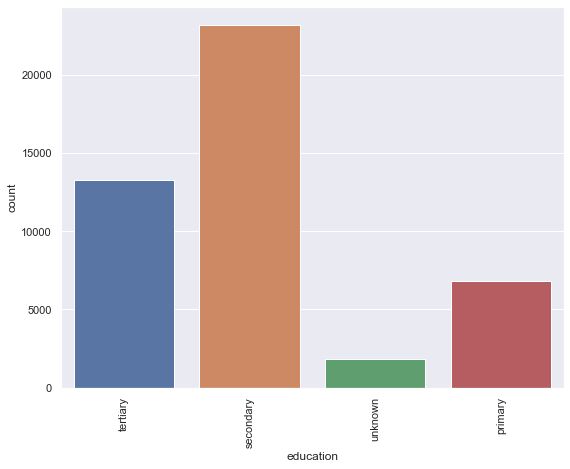

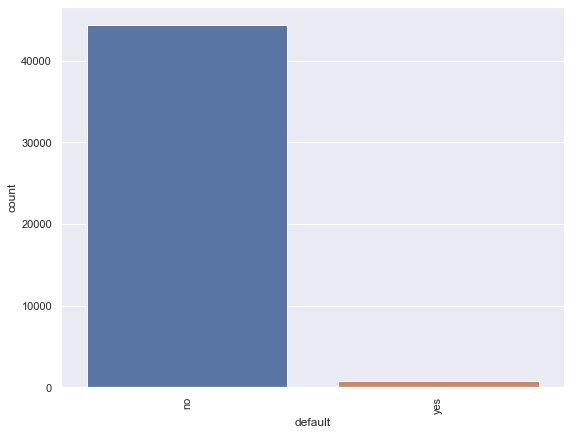

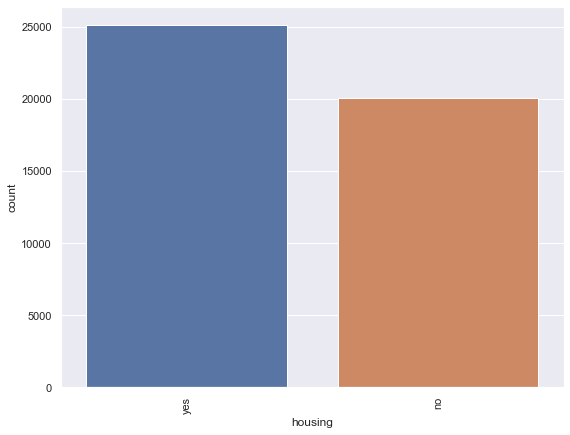

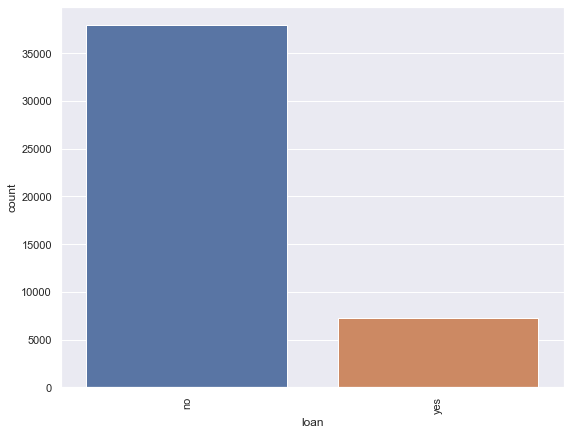

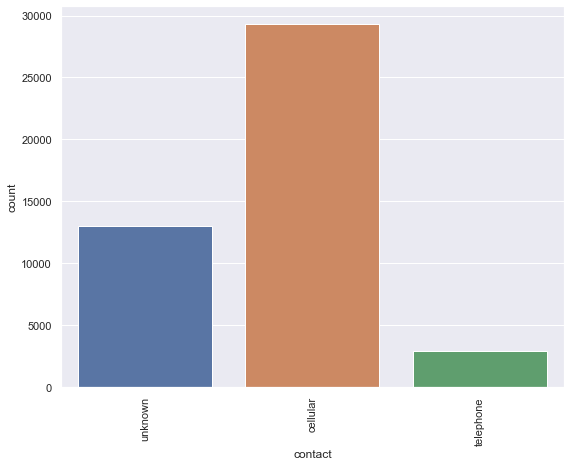

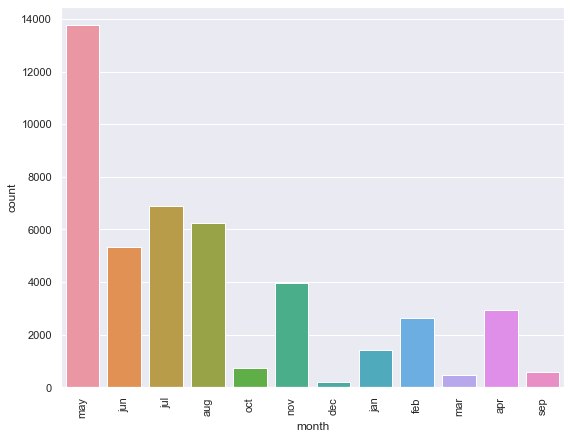

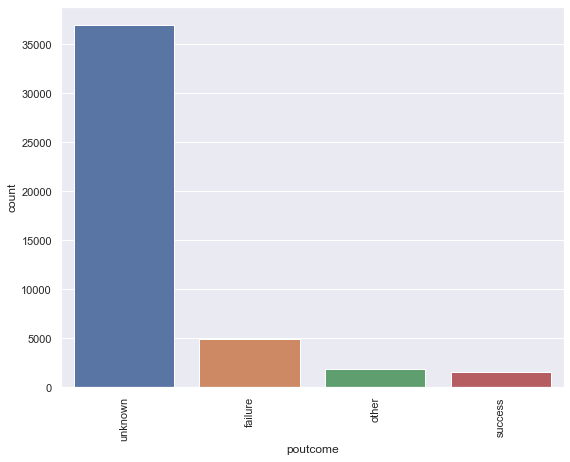

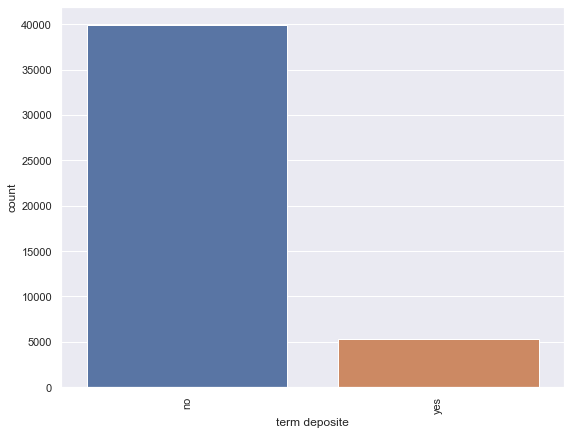

In [199]:
for column in categorical_columns:
    plt.figure(figsize = (9, 7))
    sns.countplot(data = data, x = column)
    plt.xticks(rotation = 90)
    plt.show()

In [200]:
data['default'].value_counts()

default
no     44396
yes      815
Name: count, dtype: int64

In [201]:
data.drop(columns = ['default'], axis = 'columns', inplace = True)

In [202]:
data.head()

age           job  marital  education  balance housing loan  contact  day  \
0   58    management  married   tertiary     2143     yes   no  unknown    5   
1   44    technician   single  secondary       29     yes   no  unknown    5   
2   33  entrepreneur  married  secondary        2     yes  yes  unknown    5   
3   47   blue-collar  married    unknown     1506     yes   no  unknown    5   
4   33       unknown   single    unknown        1      no   no  unknown    5   

  month  duration  campaign  pdays  previous poutcome term deposite  
0   may       261         1     -1         0  unknown            no  
1   may       151         1     -1         0  unknown            no  
2   may        76         1     -1         0  unknown            no  
3   may        92         1     -1         0  unknown            no  
4   may       198         1     -1         0  unknown            no

In [203]:
categorical_columns2, numerical_columns2 = [], []
for column in data.columns:
    if data[column].dtype != 'object':
        numerical_columns2.append(column)
    else:
        categorical_columns2.append(column)

In [204]:
numerical_columns2

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']

In [205]:
categorical_columns2

['job',
 'marital',
 'education',
 'housing',
 'loan',
 'contact',
 'month',
 'poutcome',
 'term deposite']

In [206]:
numerical_columns2_2 = ['age', 'balance', 'day', 'duration', 'pdays']
numerical_columns2_3 = ['campaign', 'previous']

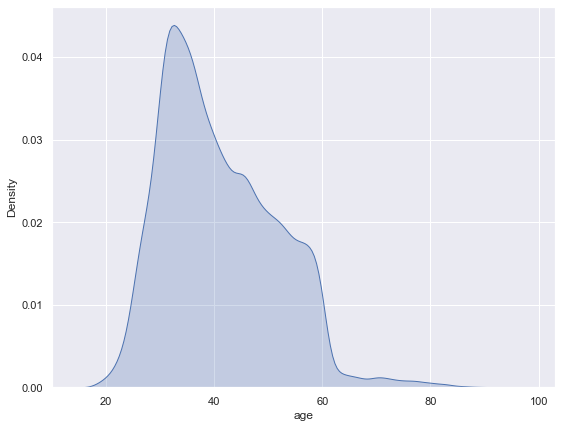

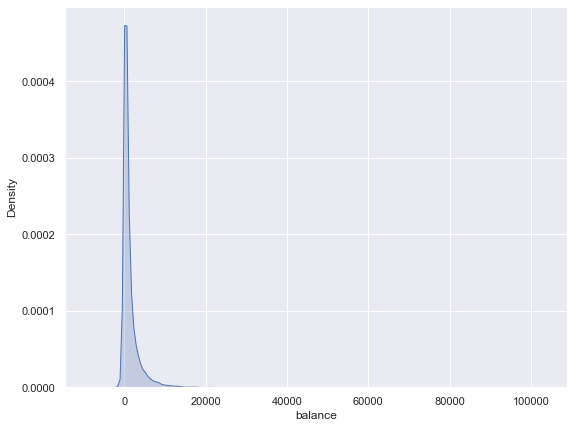

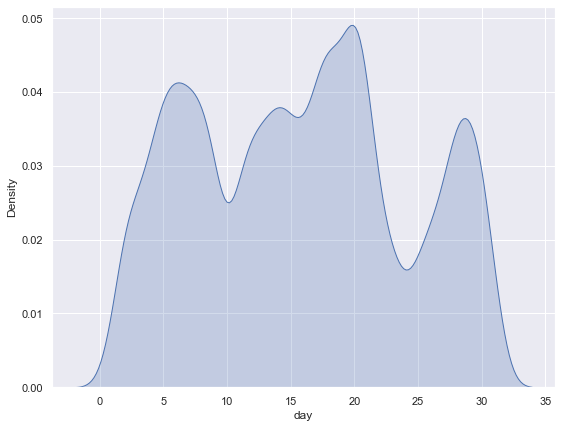

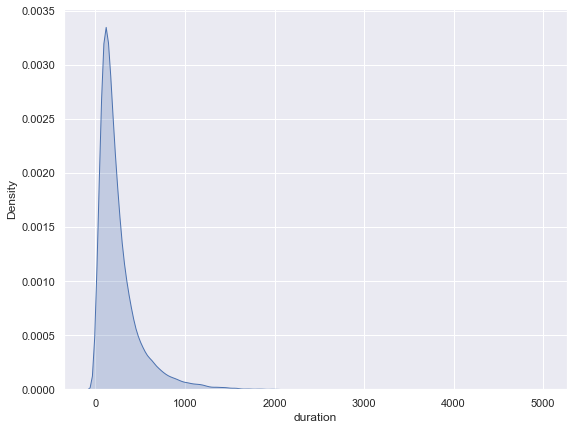

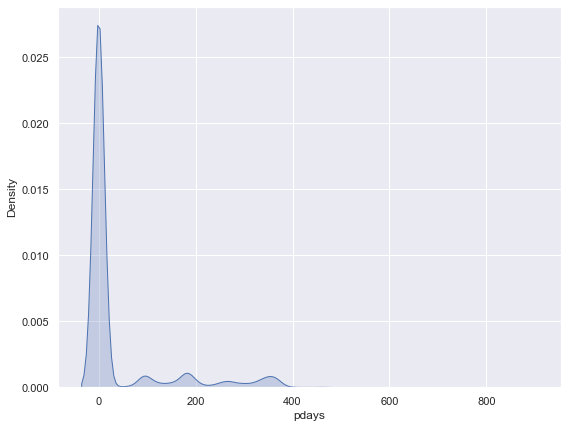

In [207]:
for column in numerical_columns2_2:
    plt.figure(figsize = (9, 7))
    sns.kdeplot(data[column], shade = True, legend = False)
    plt.show()

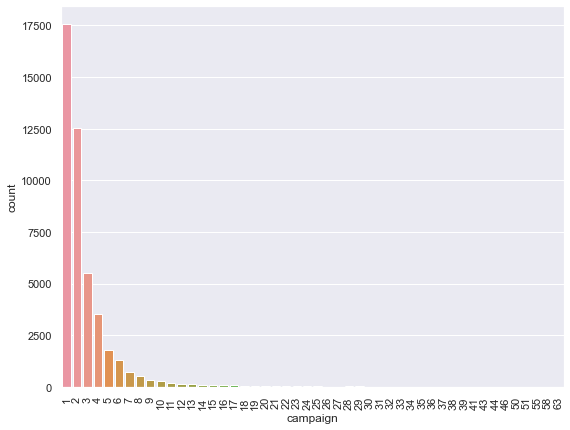

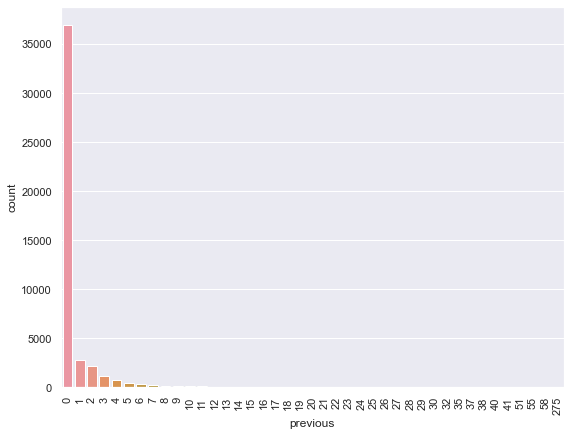

In [208]:
for column in numerical_columns2_3:
    plt.figure(figsize = (9, 7))
    sns.countplot(data = data, x = column)
    plt.xticks(rotation = 90)
    plt.show()

<Figure size 648x504 with 0 Axes>

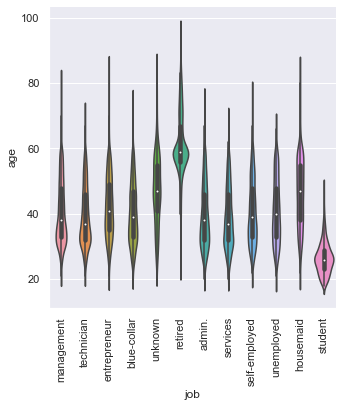

<Figure size 648x504 with 0 Axes>

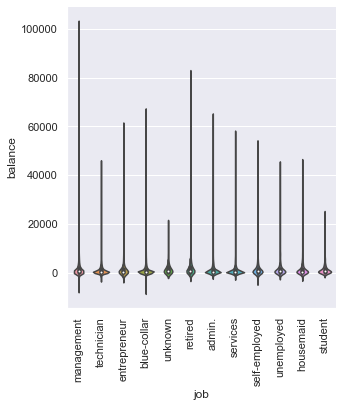

<Figure size 648x504 with 0 Axes>

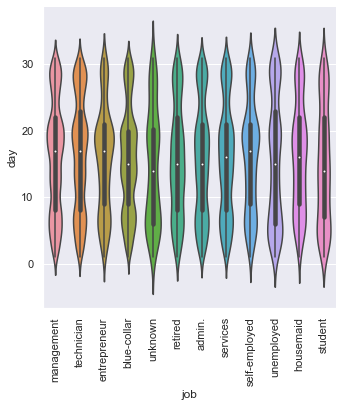

<Figure size 648x504 with 0 Axes>

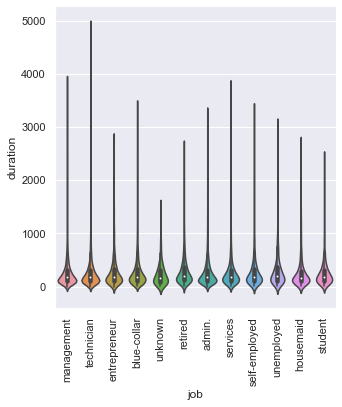

<Figure size 648x504 with 0 Axes>

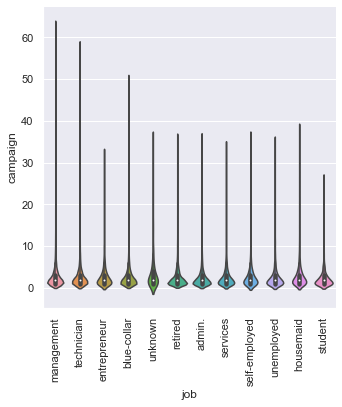

<Figure size 648x504 with 0 Axes>

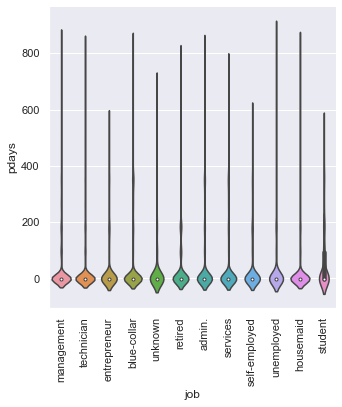

<Figure size 648x504 with 0 Axes>

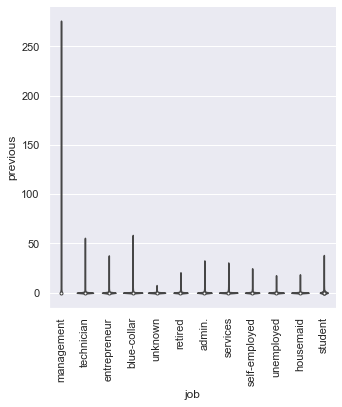

<Figure size 648x504 with 0 Axes>

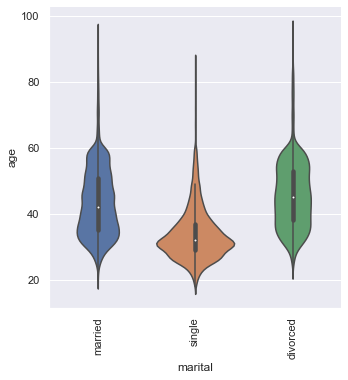

<Figure size 648x504 with 0 Axes>

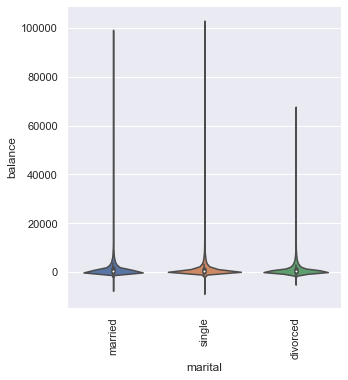

<Figure size 648x504 with 0 Axes>

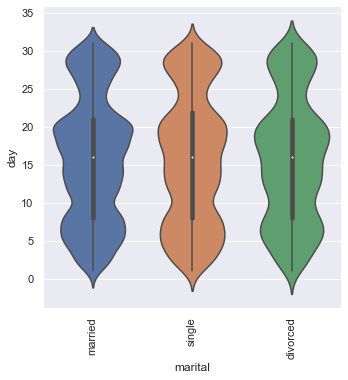

<Figure size 648x504 with 0 Axes>

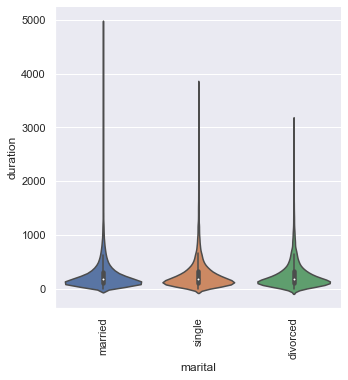

<Figure size 648x504 with 0 Axes>

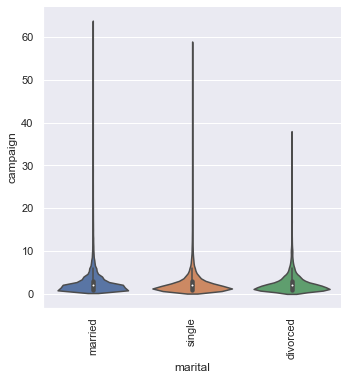

<Figure size 648x504 with 0 Axes>

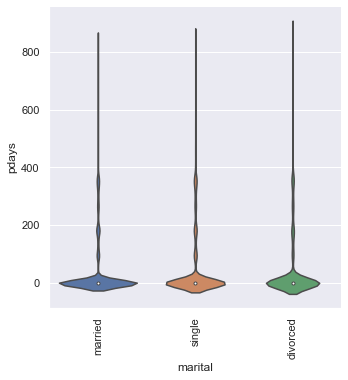

<Figure size 648x504 with 0 Axes>

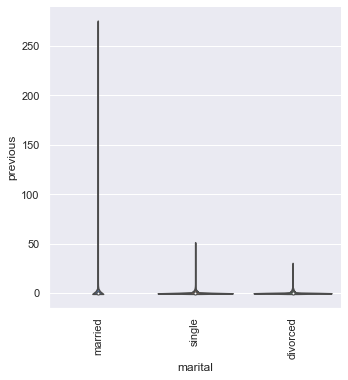

<Figure size 648x504 with 0 Axes>

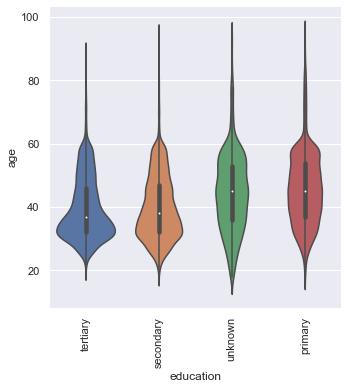

<Figure size 648x504 with 0 Axes>

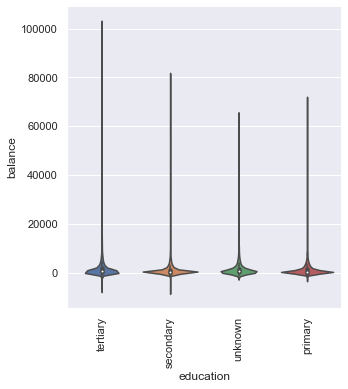

<Figure size 648x504 with 0 Axes>

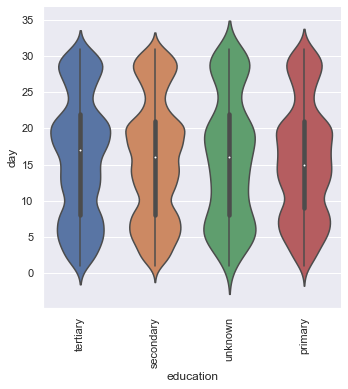

<Figure size 648x504 with 0 Axes>

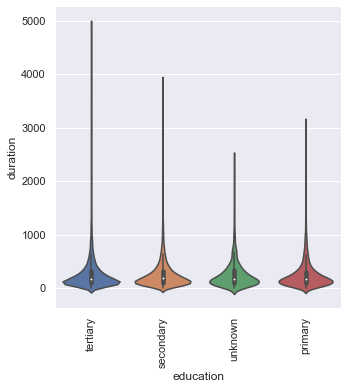

<Figure size 648x504 with 0 Axes>

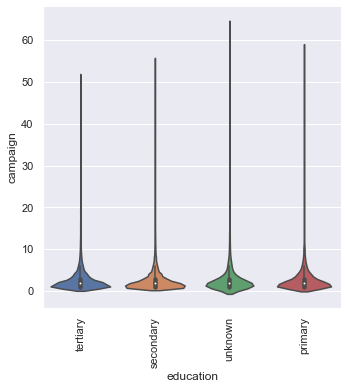

<Figure size 648x504 with 0 Axes>

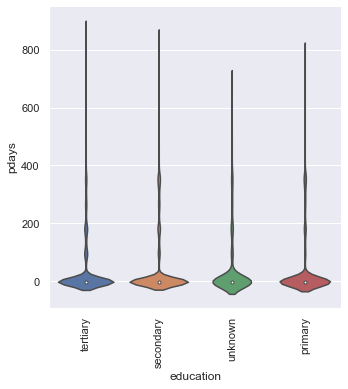

<Figure size 648x504 with 0 Axes>

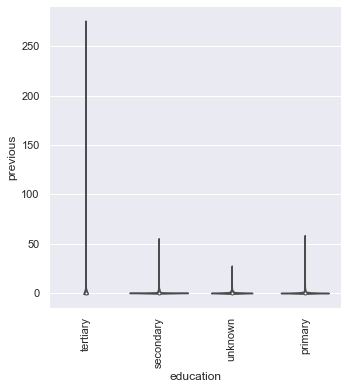

<Figure size 648x504 with 0 Axes>

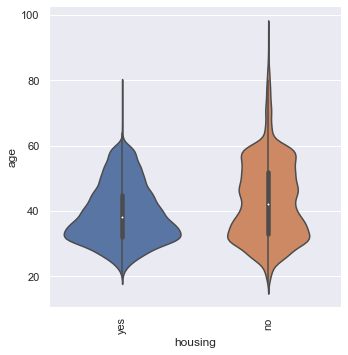

<Figure size 648x504 with 0 Axes>

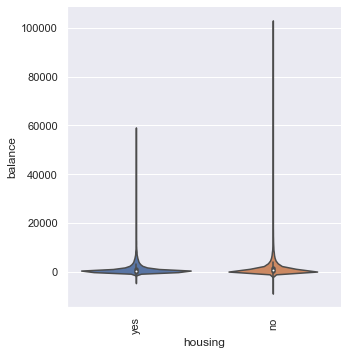

<Figure size 648x504 with 0 Axes>

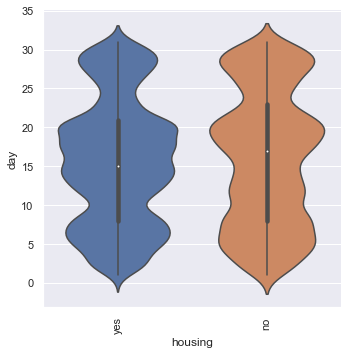

<Figure size 648x504 with 0 Axes>

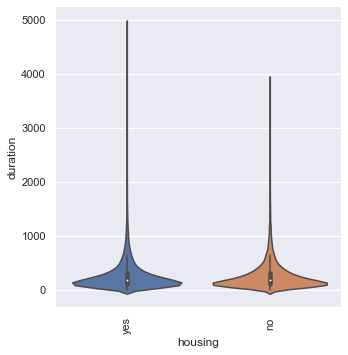

<Figure size 648x504 with 0 Axes>

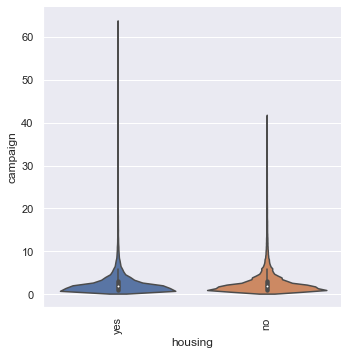

<Figure size 648x504 with 0 Axes>

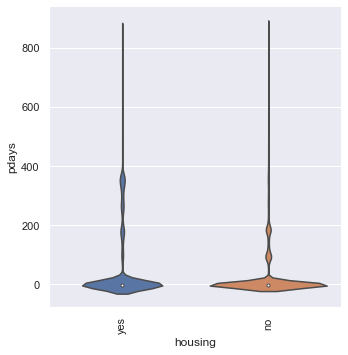

<Figure size 648x504 with 0 Axes>

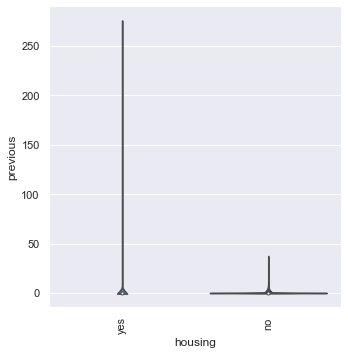

<Figure size 648x504 with 0 Axes>

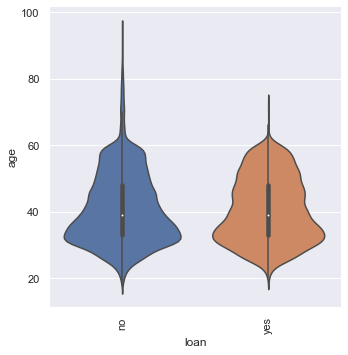

<Figure size 648x504 with 0 Axes>

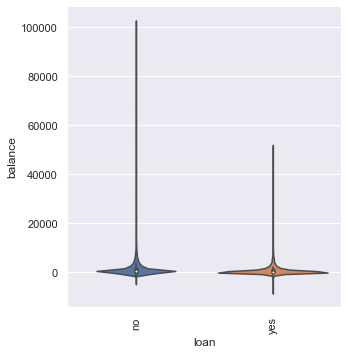

<Figure size 648x504 with 0 Axes>

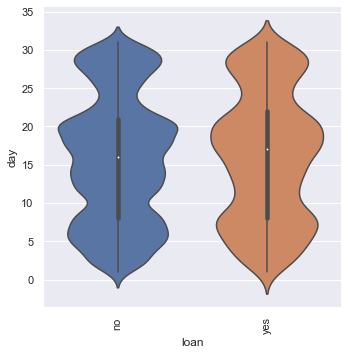

<Figure size 648x504 with 0 Axes>

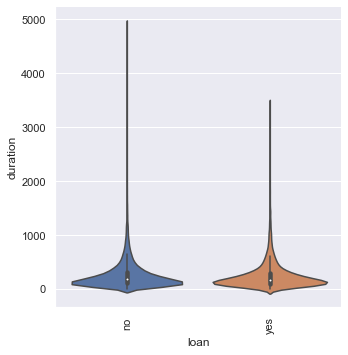

<Figure size 648x504 with 0 Axes>

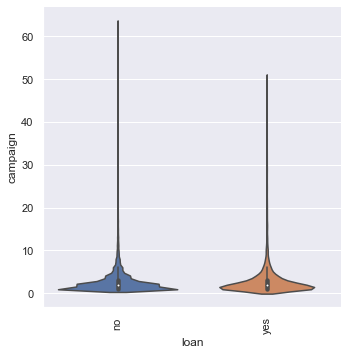

<Figure size 648x504 with 0 Axes>

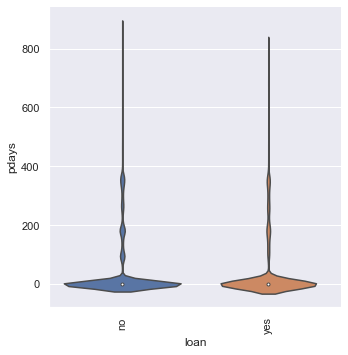

<Figure size 648x504 with 0 Axes>

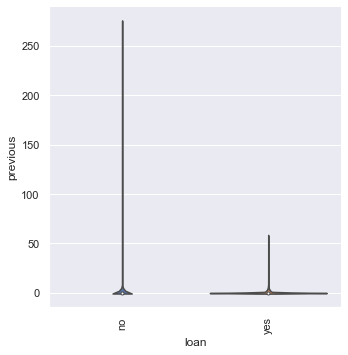

<Figure size 648x504 with 0 Axes>

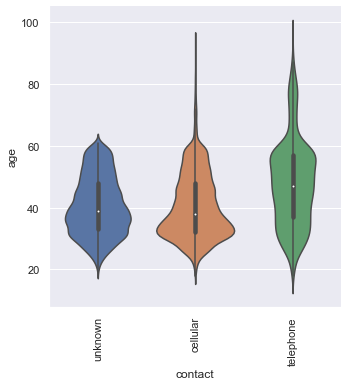

<Figure size 648x504 with 0 Axes>

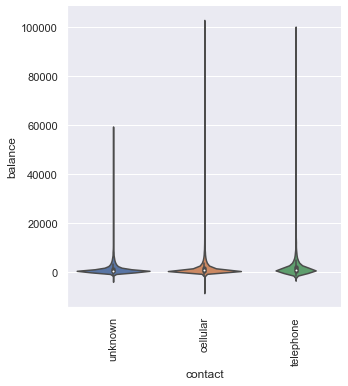

<Figure size 648x504 with 0 Axes>

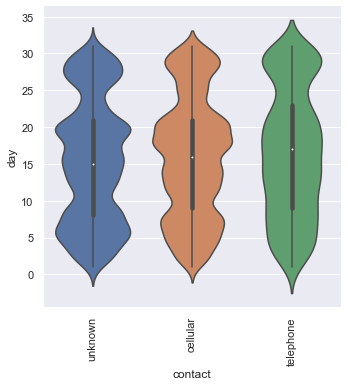

<Figure size 648x504 with 0 Axes>

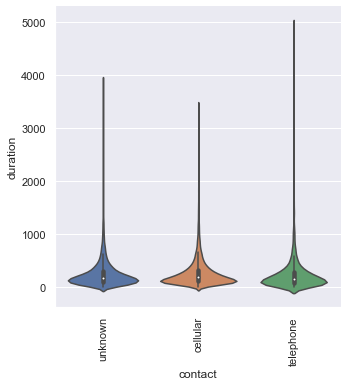

<Figure size 648x504 with 0 Axes>

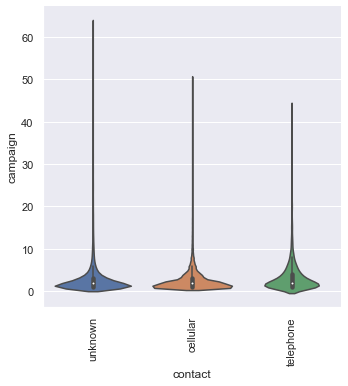

<Figure size 648x504 with 0 Axes>

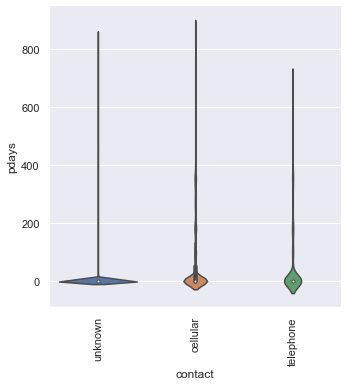

<Figure size 648x504 with 0 Axes>

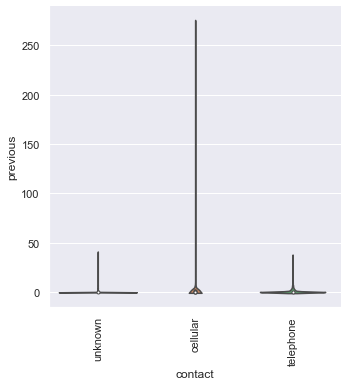

<Figure size 648x504 with 0 Axes>

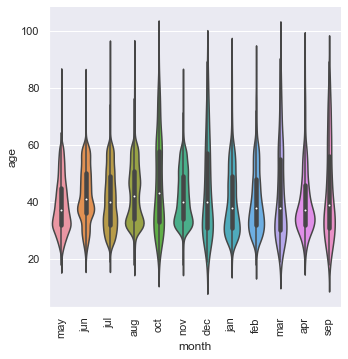

<Figure size 648x504 with 0 Axes>

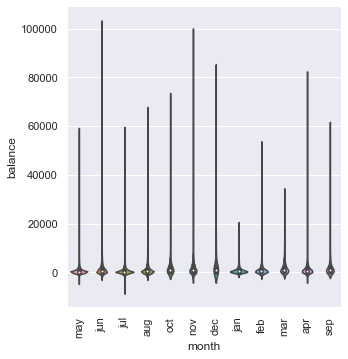

<Figure size 648x504 with 0 Axes>

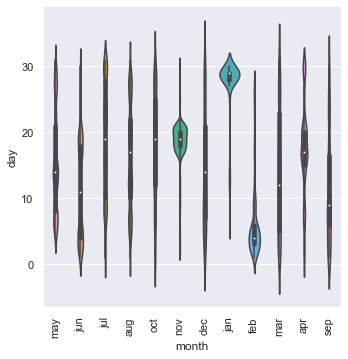

<Figure size 648x504 with 0 Axes>

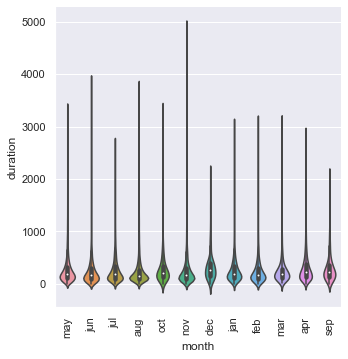

<Figure size 648x504 with 0 Axes>

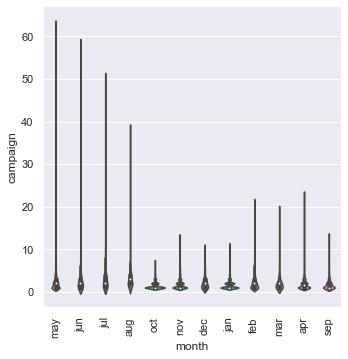

<Figure size 648x504 with 0 Axes>

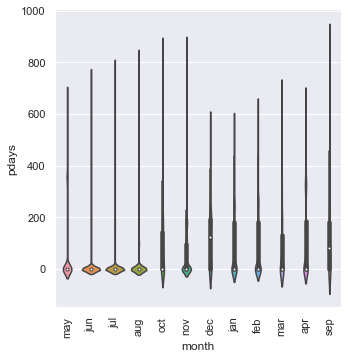

<Figure size 648x504 with 0 Axes>

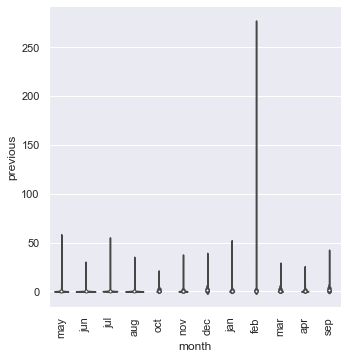

<Figure size 648x504 with 0 Axes>

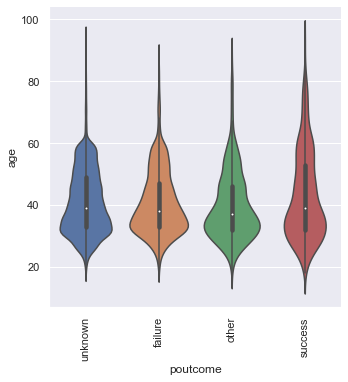

<Figure size 648x504 with 0 Axes>

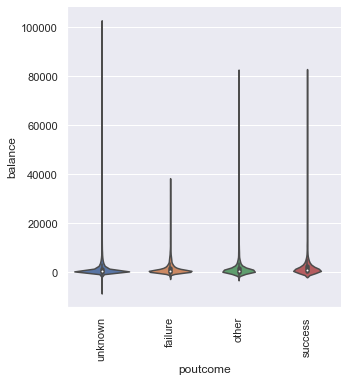

<Figure size 648x504 with 0 Axes>

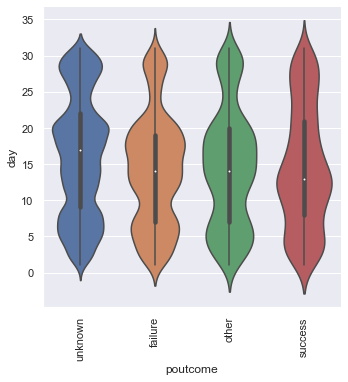

<Figure size 648x504 with 0 Axes>

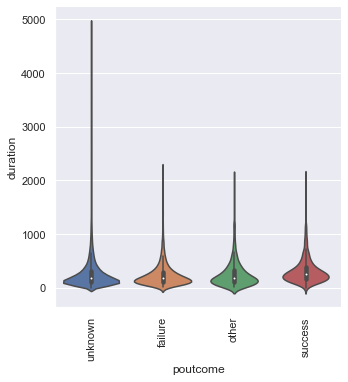

<Figure size 648x504 with 0 Axes>

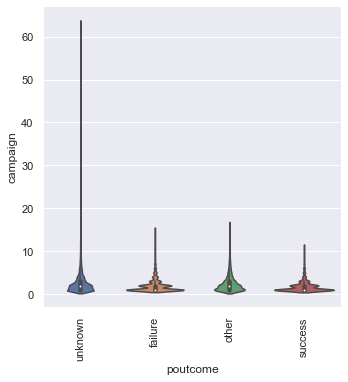

<Figure size 648x504 with 0 Axes>

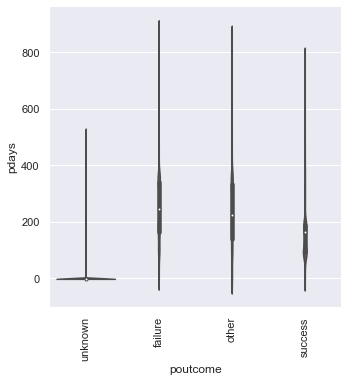

<Figure size 648x504 with 0 Axes>

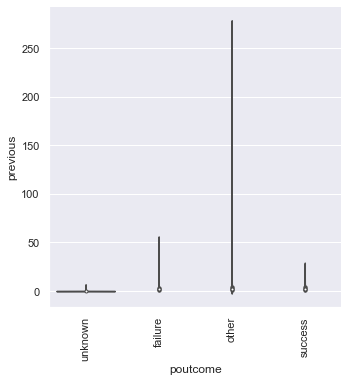

<Figure size 648x504 with 0 Axes>

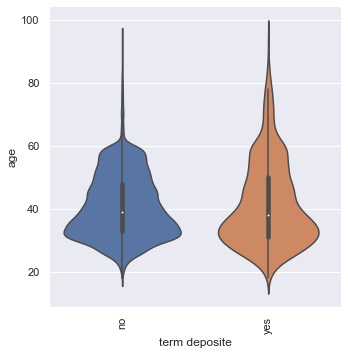

<Figure size 648x504 with 0 Axes>

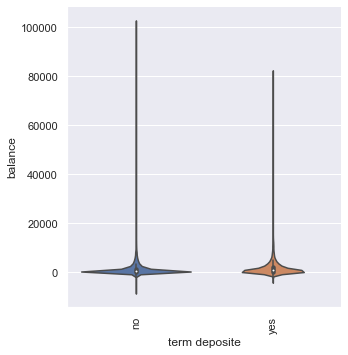

<Figure size 648x504 with 0 Axes>

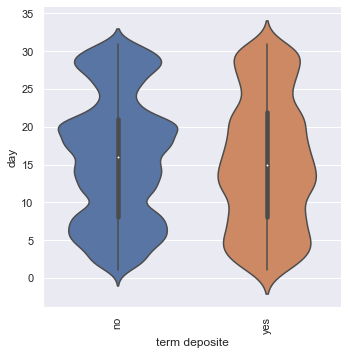

<Figure size 648x504 with 0 Axes>

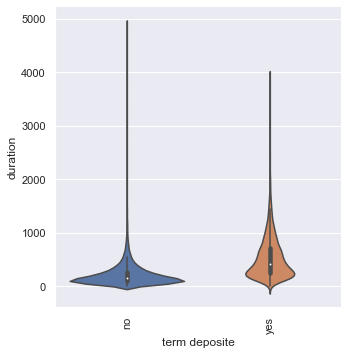

<Figure size 648x504 with 0 Axes>

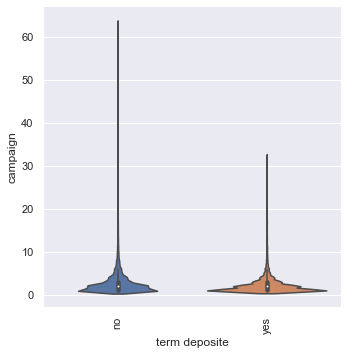

<Figure size 648x504 with 0 Axes>

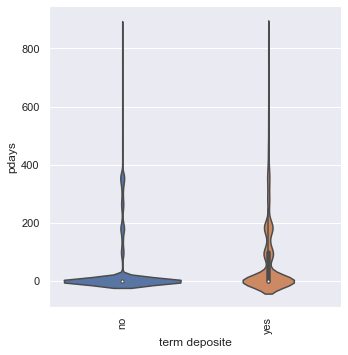

<Figure size 648x504 with 0 Axes>

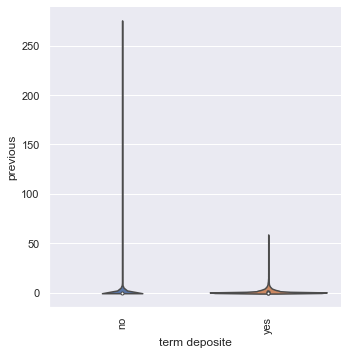

In [209]:
for i in categorical_columns2:
    for j in numerical_columns2:
        plt.figure(figsize = (9, 7))
        sns.catplot(data = data, x = i, y = j, kind = 'violin')
        plt.xticks(rotation = 90)

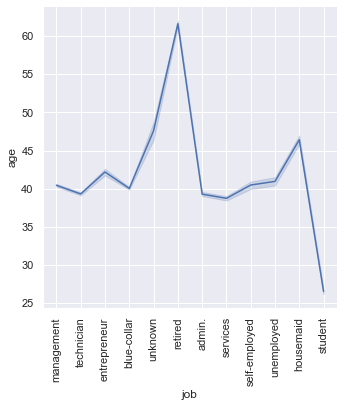

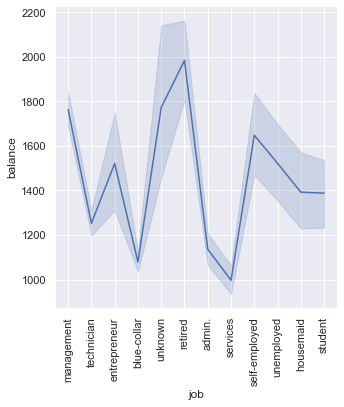

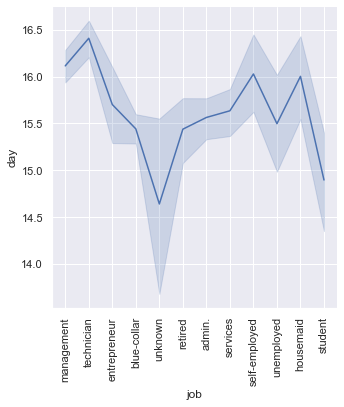

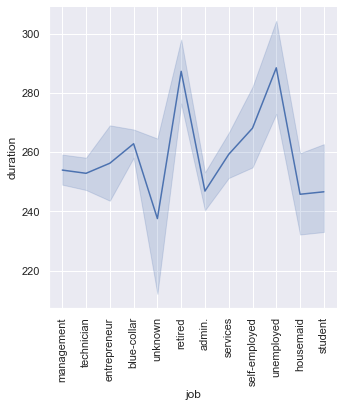

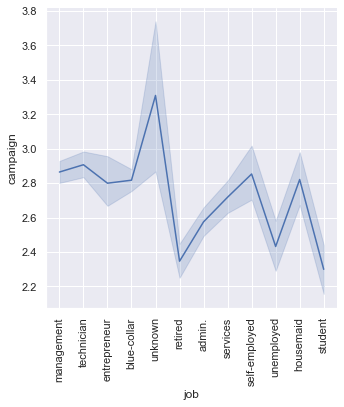

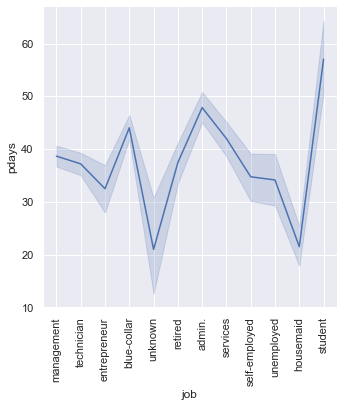

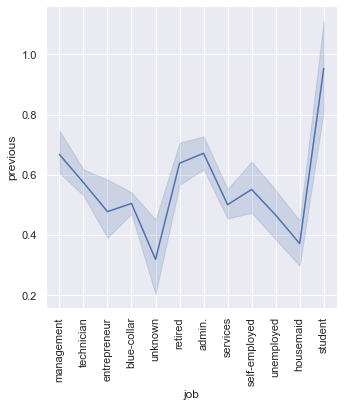

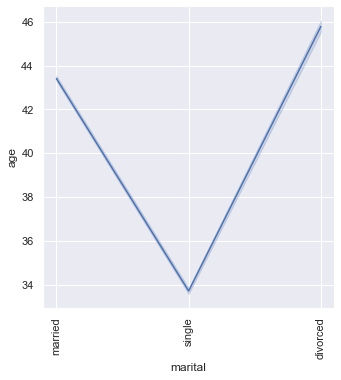

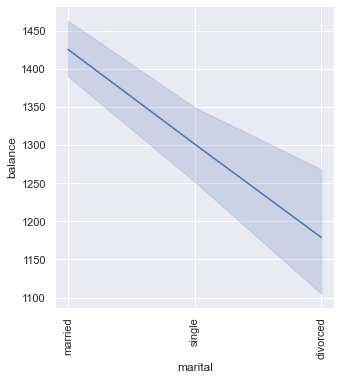

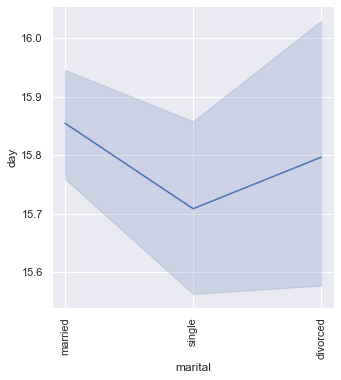

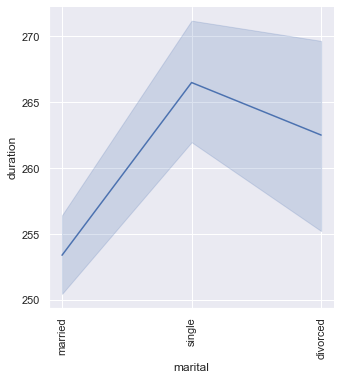

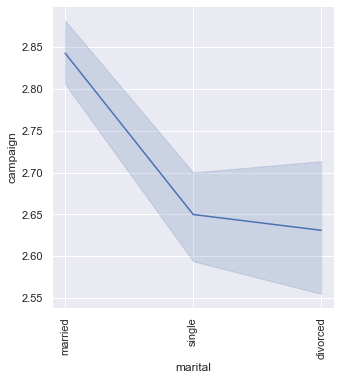

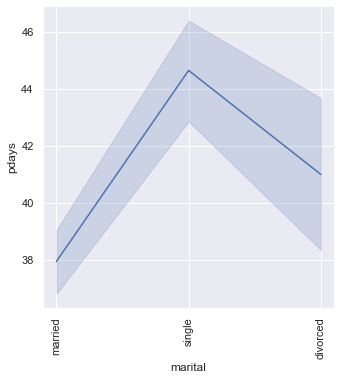

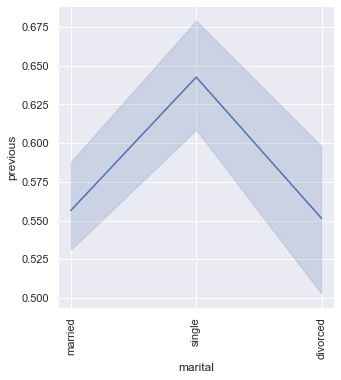

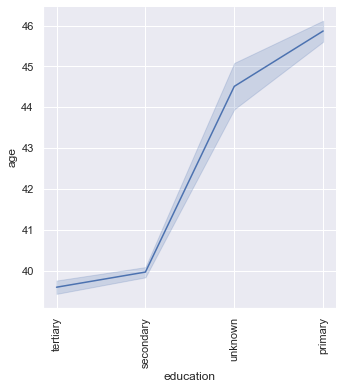

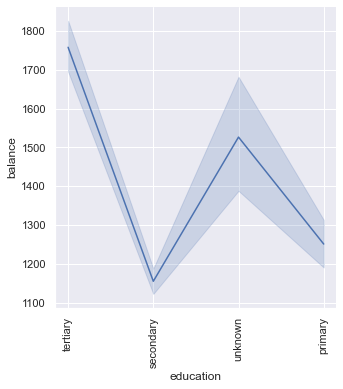

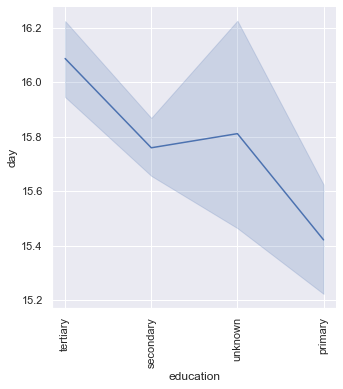

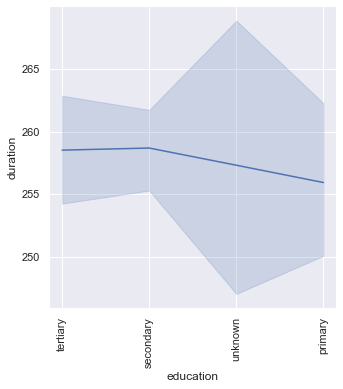

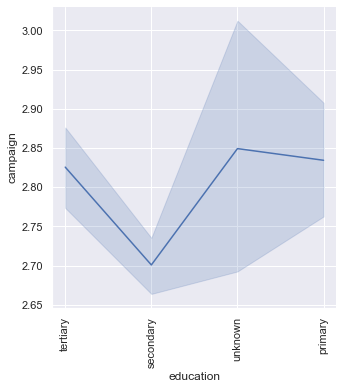

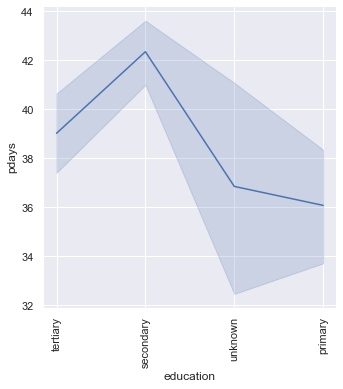

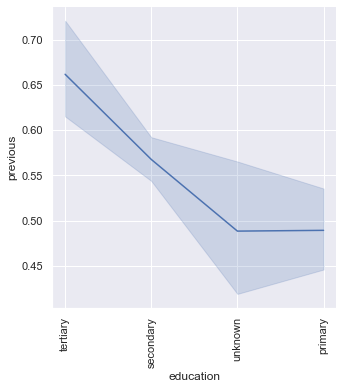

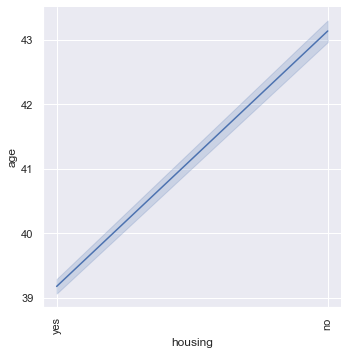

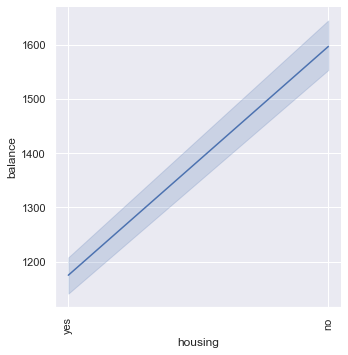

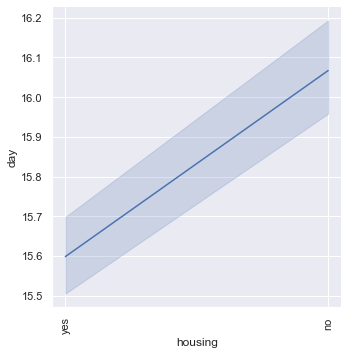

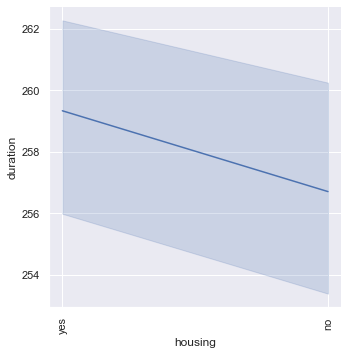

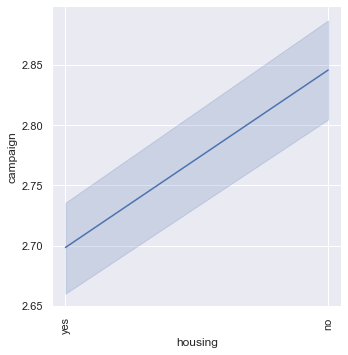

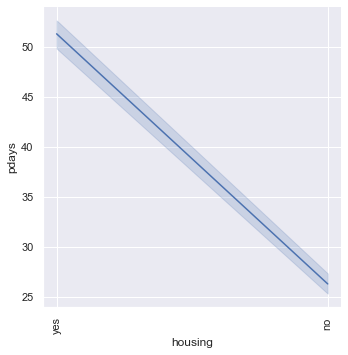

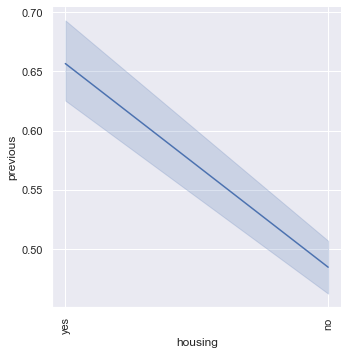

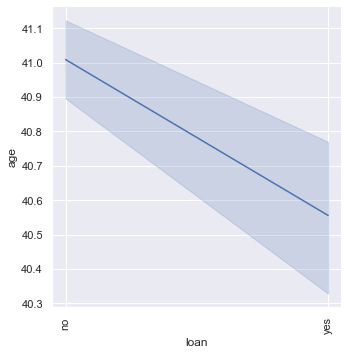

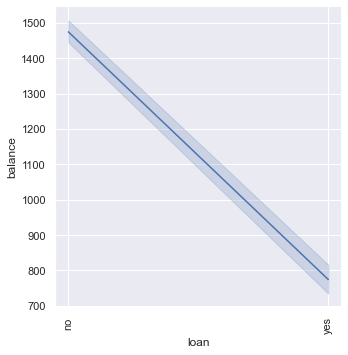

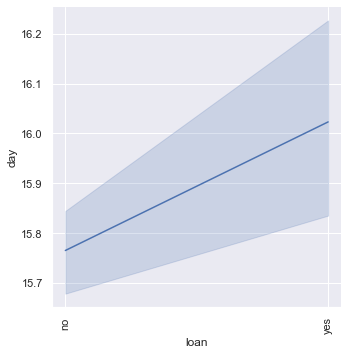

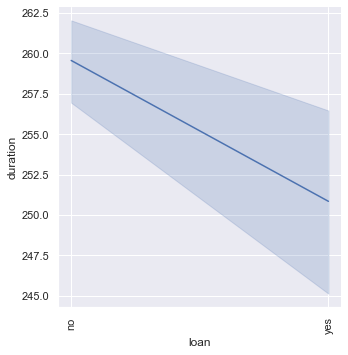

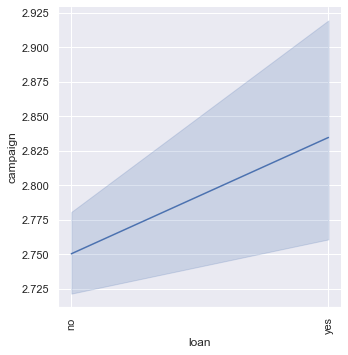

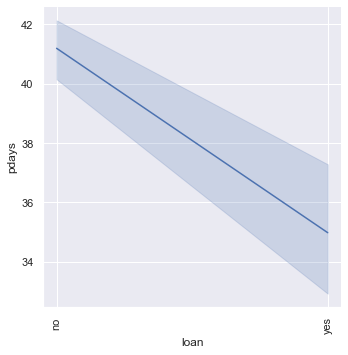

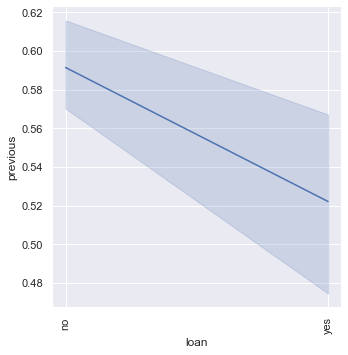

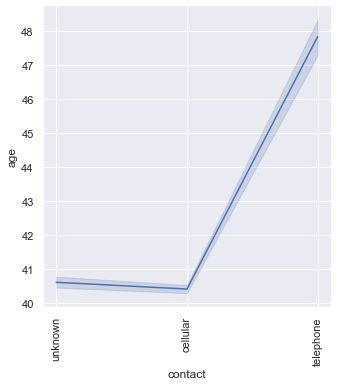

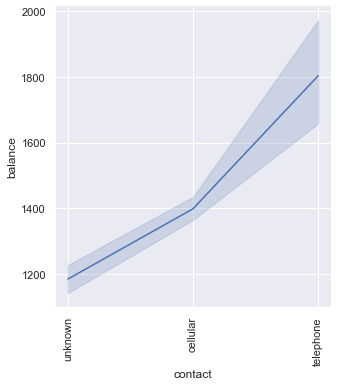

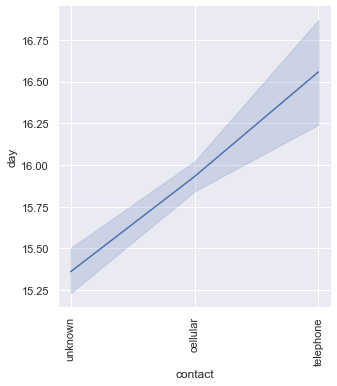

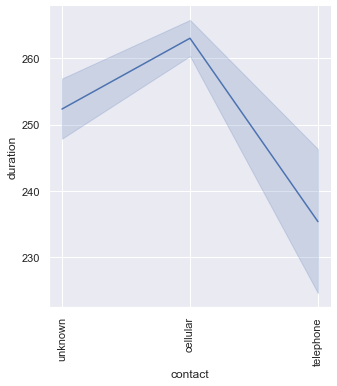

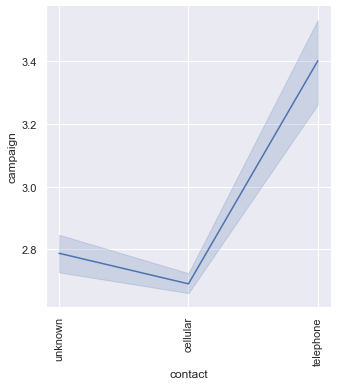

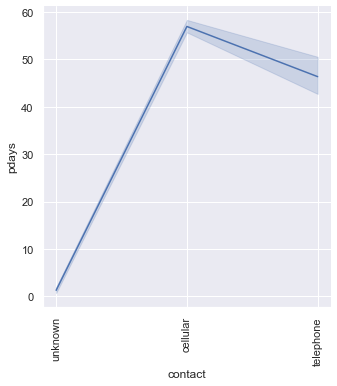

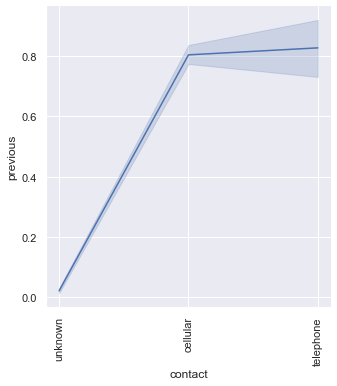

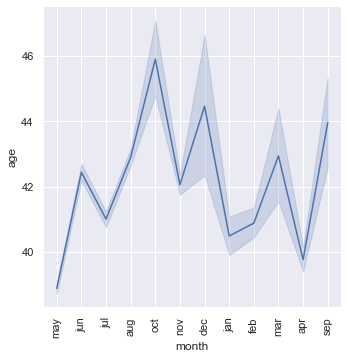

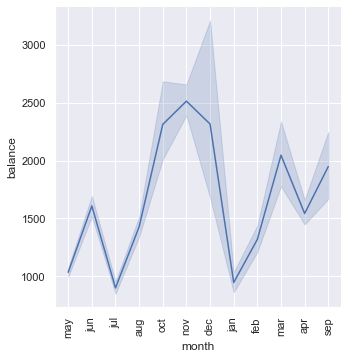

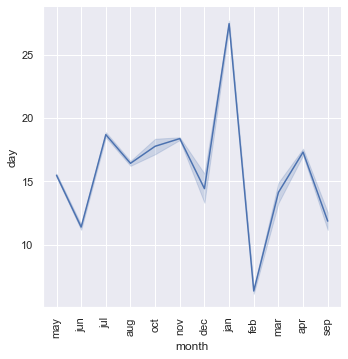

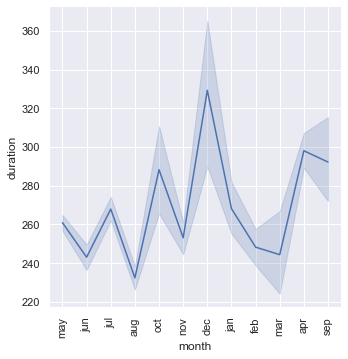

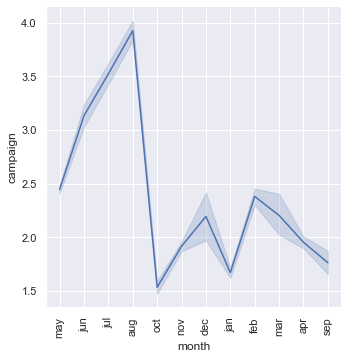

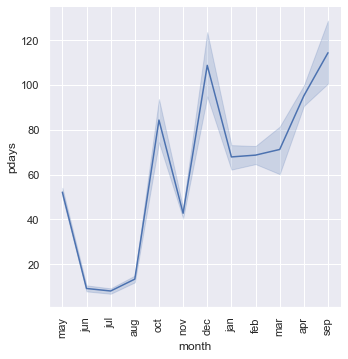

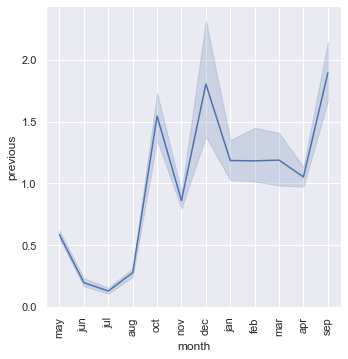

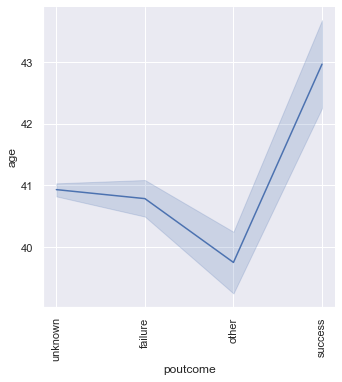

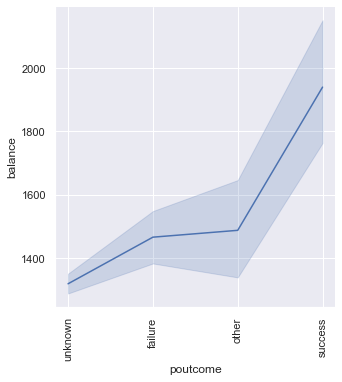

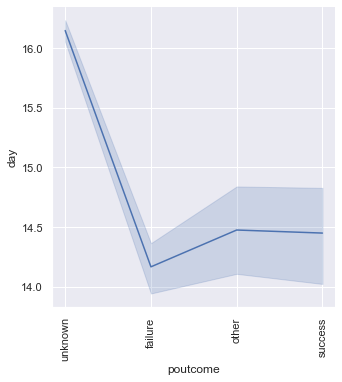

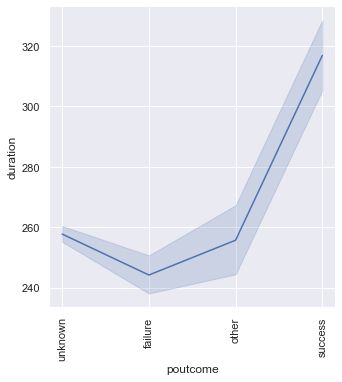

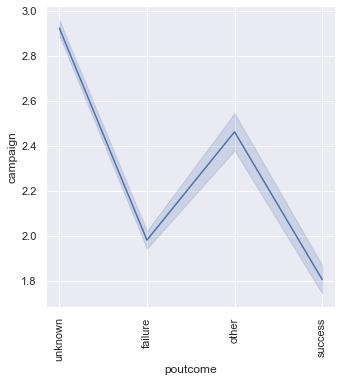

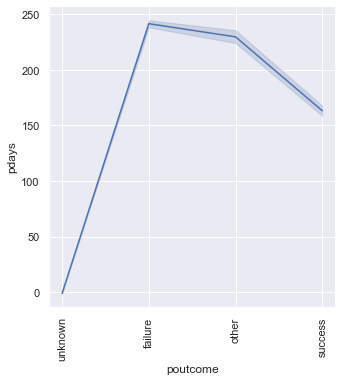

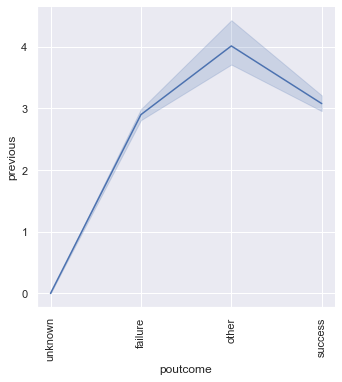

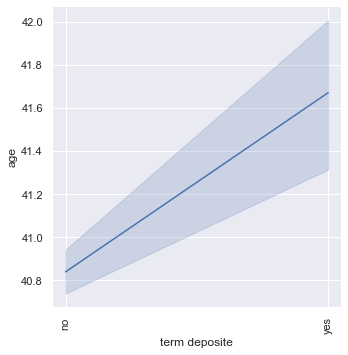

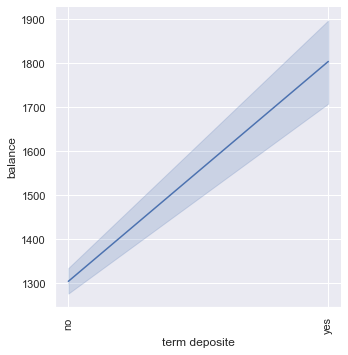

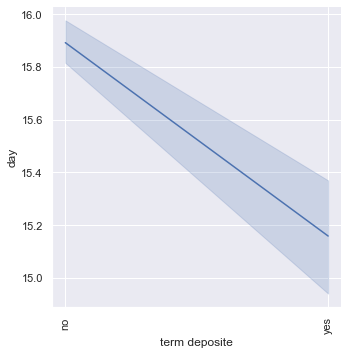

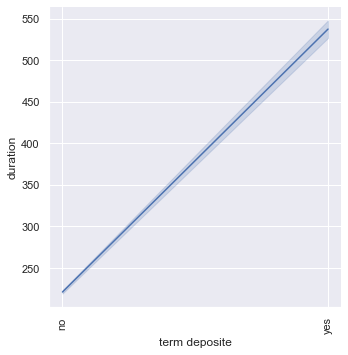

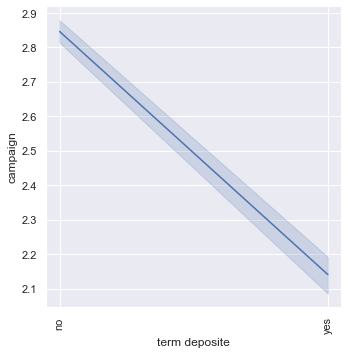

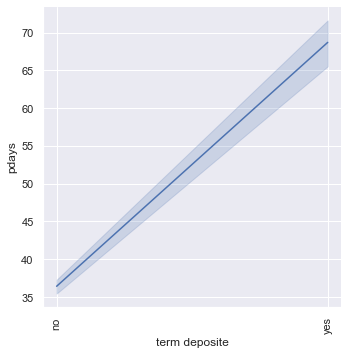

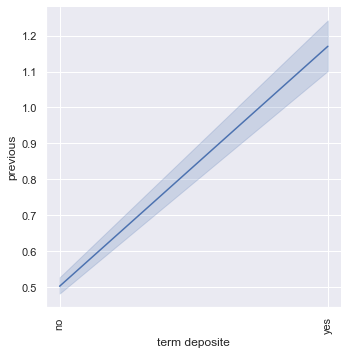

In [210]:
for i in categorical_columns2:
    for j in numerical_columns2:
        sns.relplot(data = data, x = i, y = j, kind = 'line')
        plt.xticks(rotation = 90)

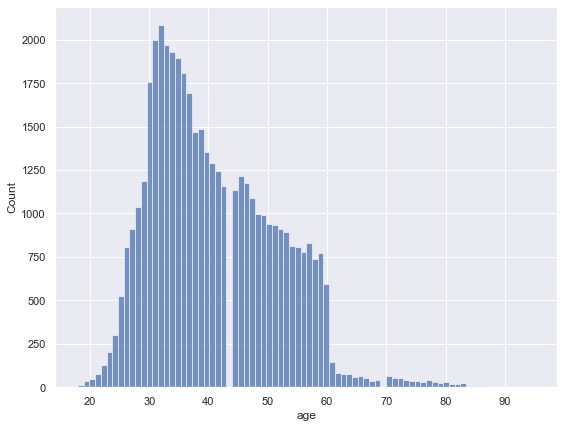

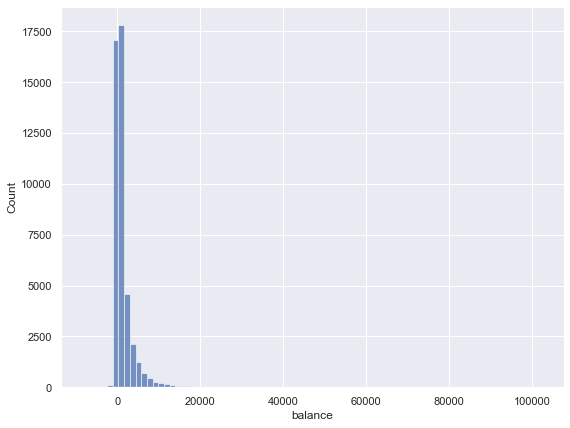

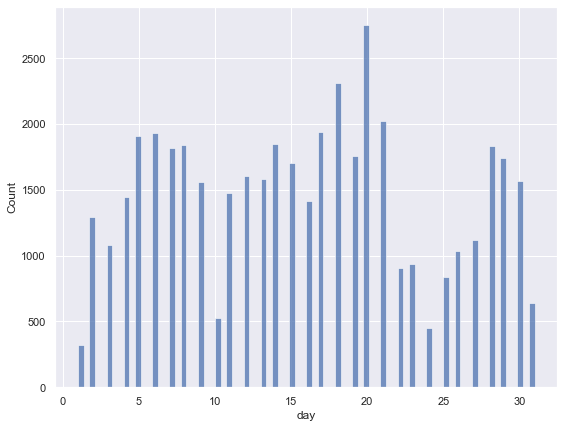

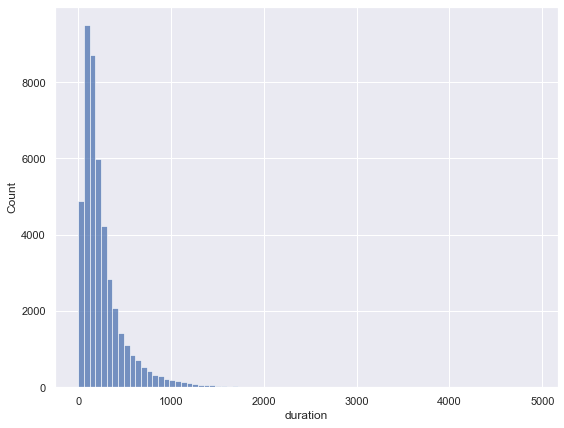

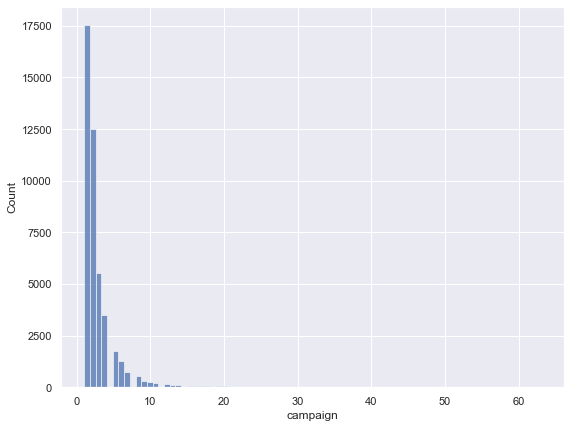

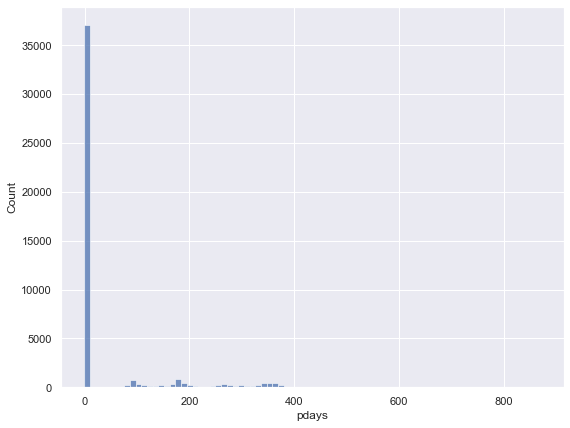

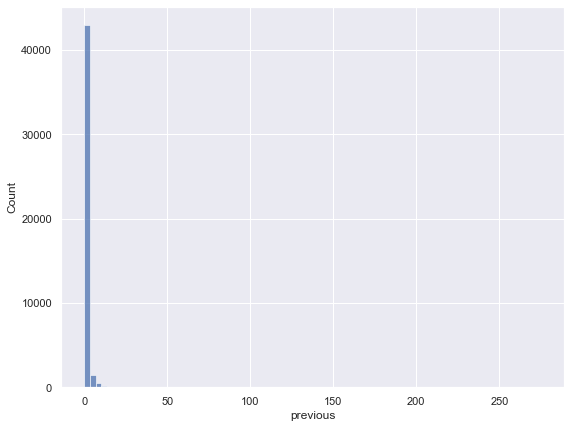

In [211]:
for column in numerical_columns2:
    plt.figure(figsize = (9, 7))
    sns.histplot(data[column], bins = 80)
    plt.show()

In [212]:
data.head()

age           job  marital  education  balance housing loan  contact  day  \
0   58    management  married   tertiary     2143     yes   no  unknown    5   
1   44    technician   single  secondary       29     yes   no  unknown    5   
2   33  entrepreneur  married  secondary        2     yes  yes  unknown    5   
3   47   blue-collar  married    unknown     1506     yes   no  unknown    5   
4   33       unknown   single    unknown        1      no   no  unknown    5   

  month  duration  campaign  pdays  previous poutcome term deposite  
0   may       261         1     -1         0  unknown            no  
1   may       151         1     -1         0  unknown            no  
2   may        76         1     -1         0  unknown            no  
3   may        92         1     -1         0  unknown            no  
4   may       198         1     -1         0  unknown            no

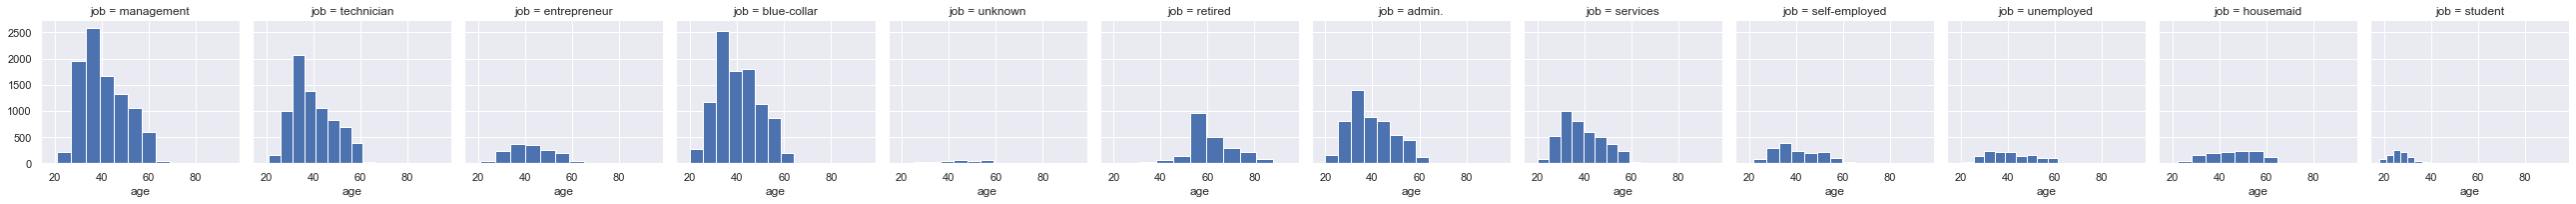

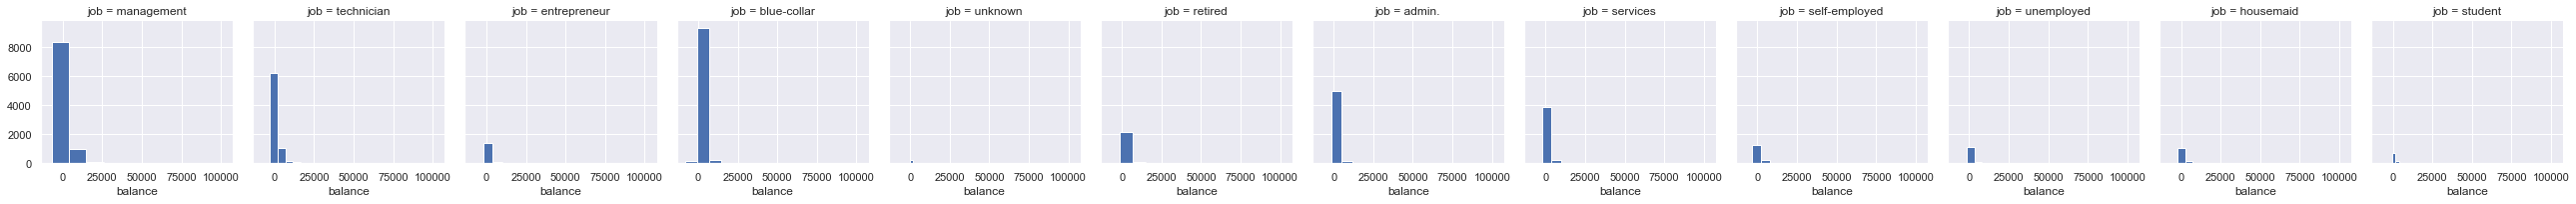

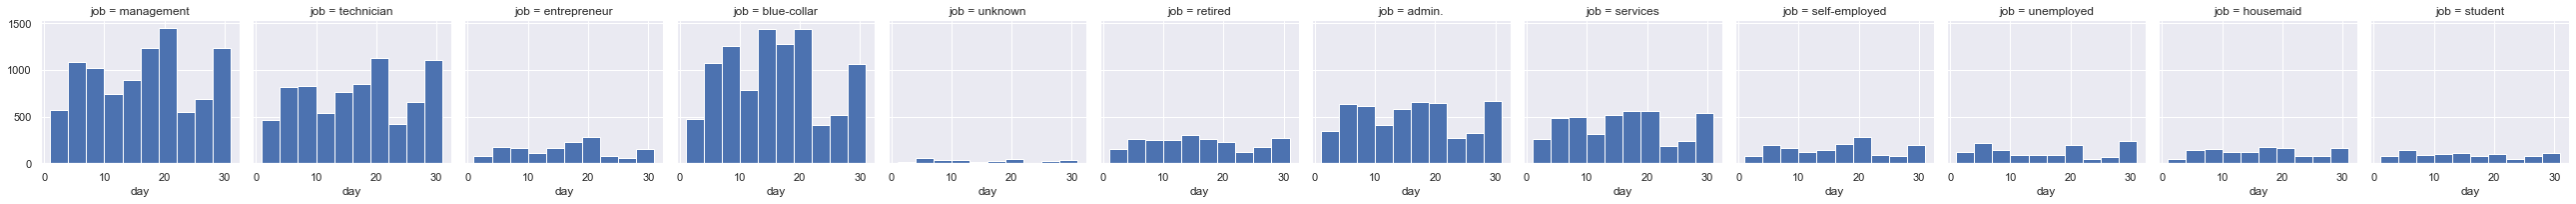

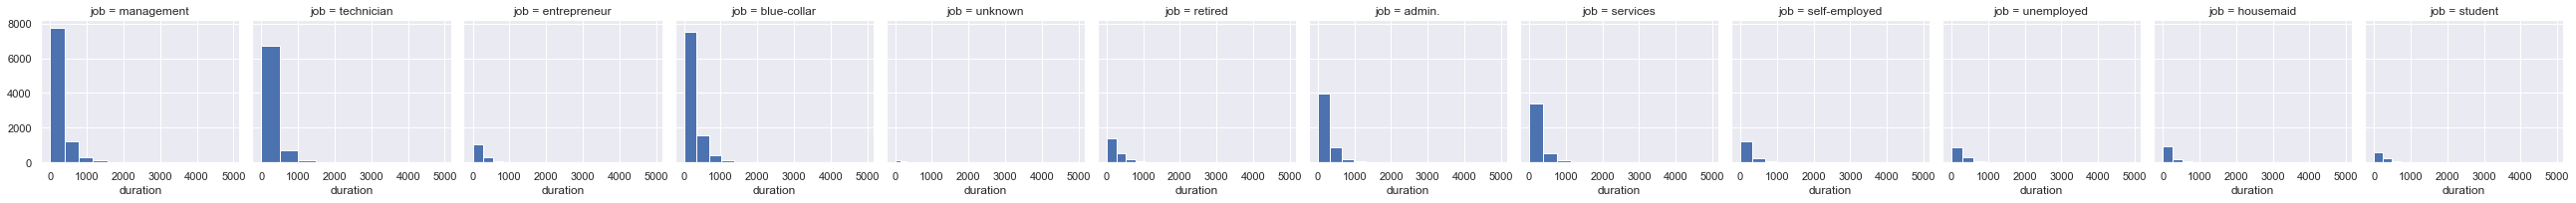

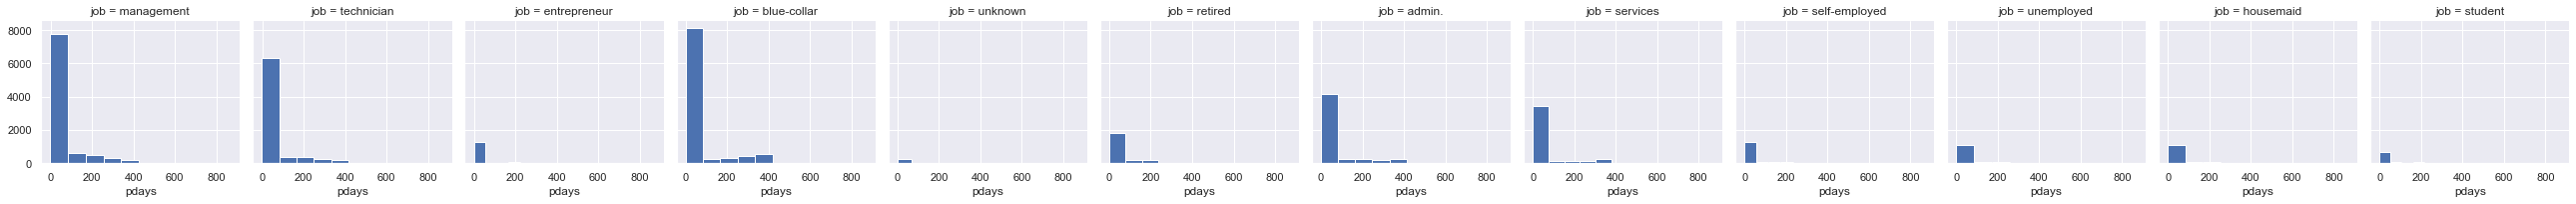

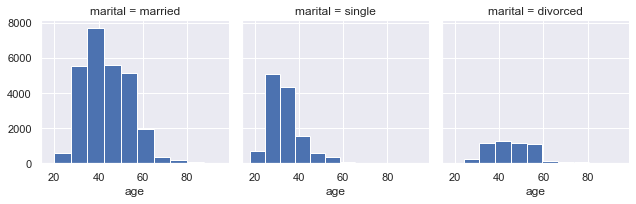

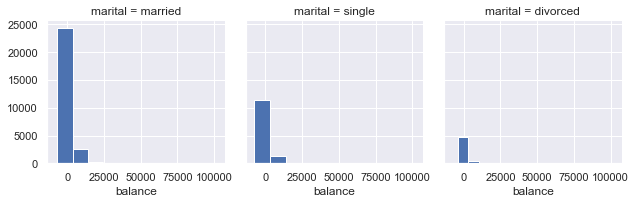

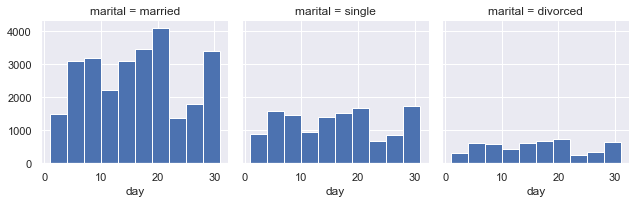

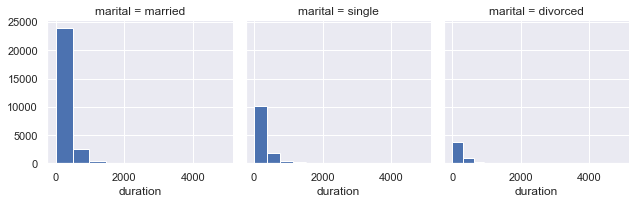

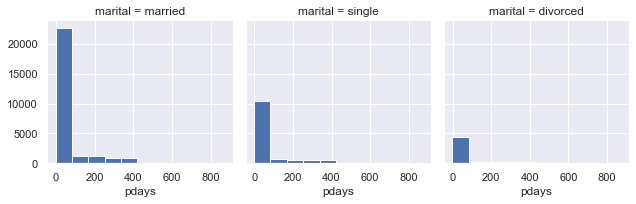

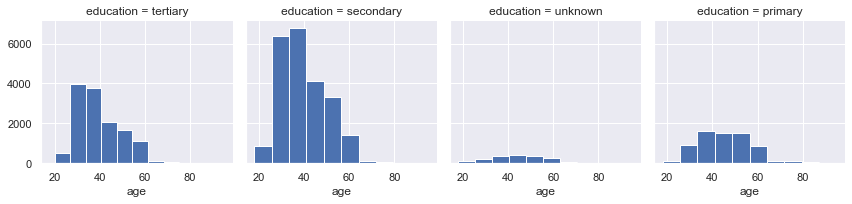

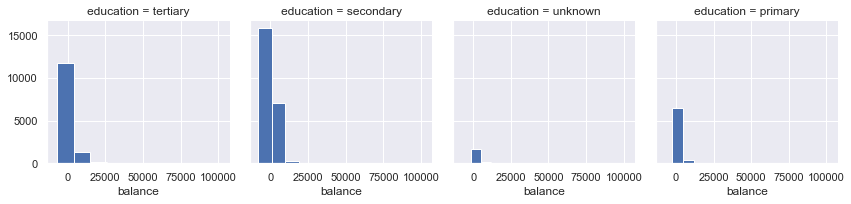

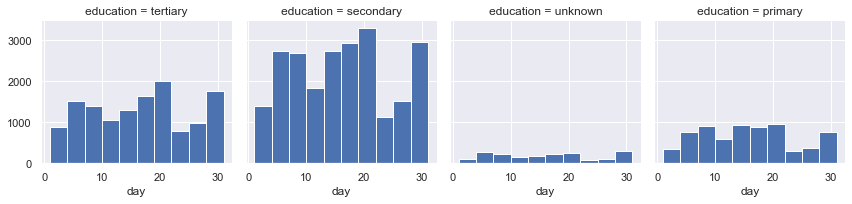

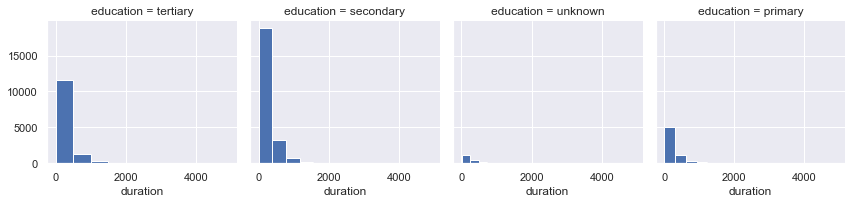

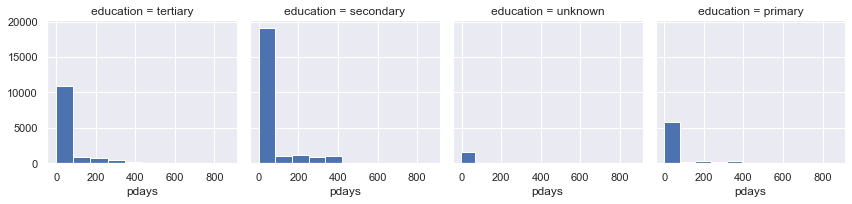

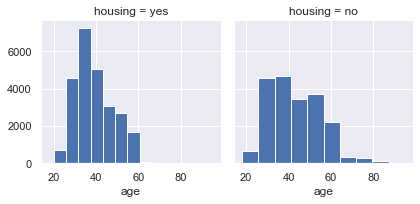

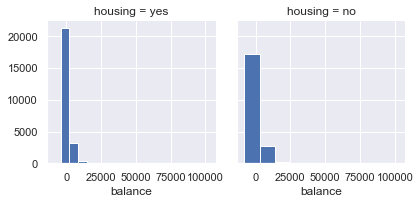

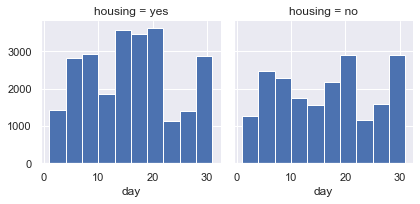

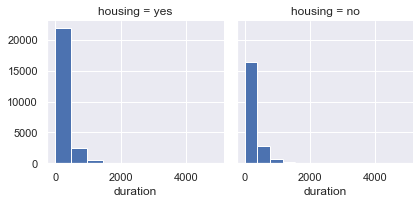

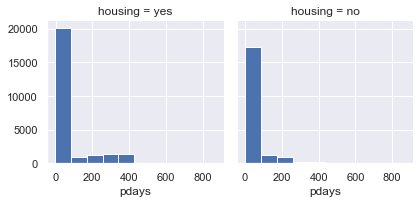

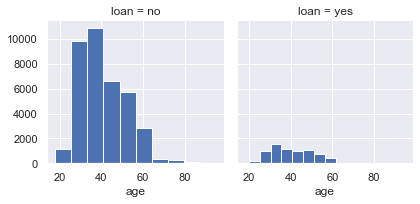

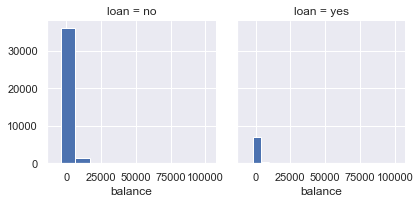

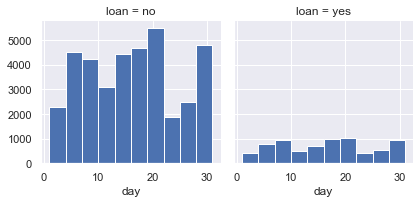

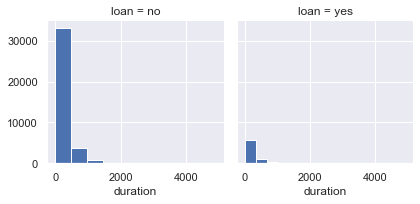

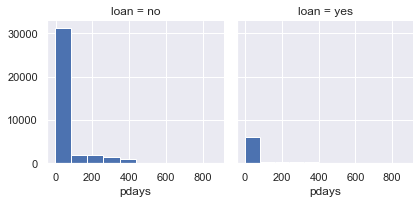

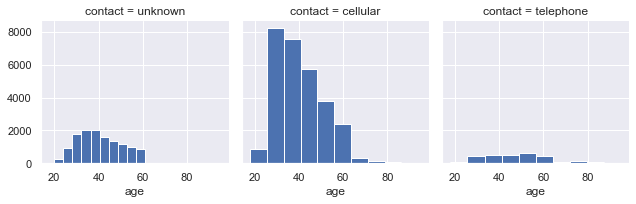

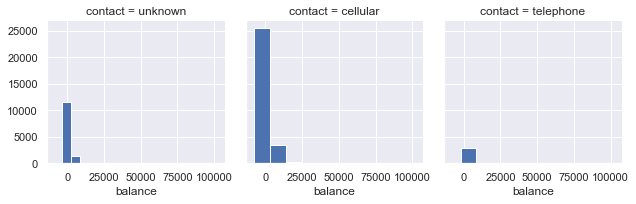

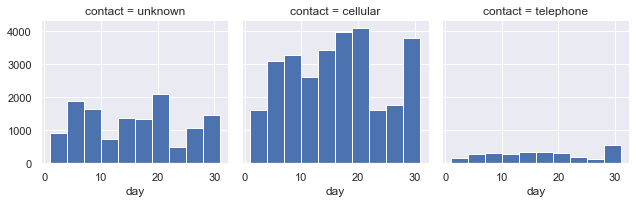

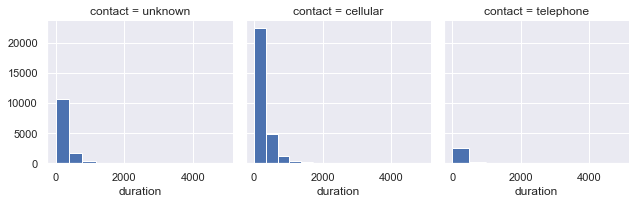

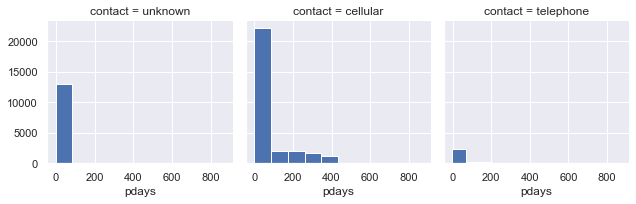

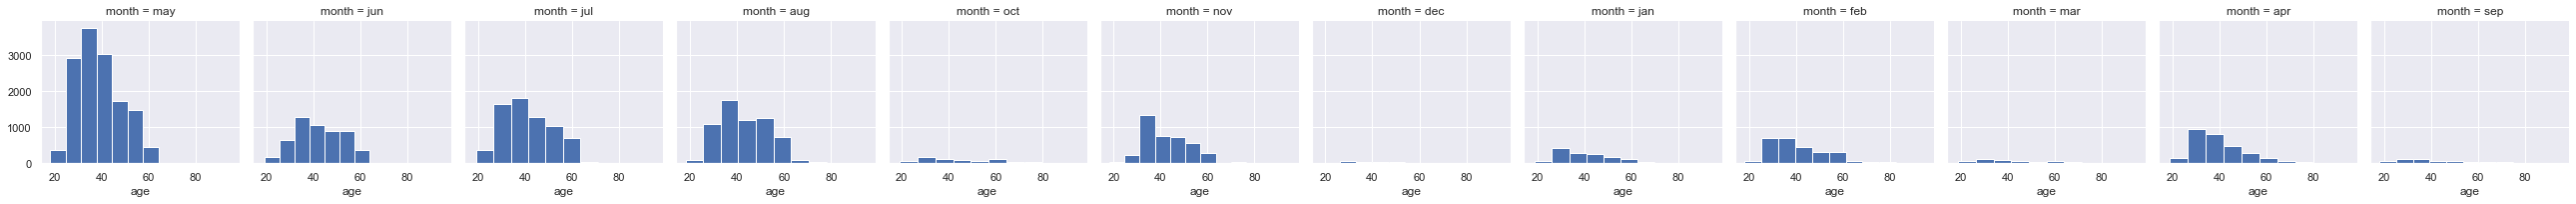

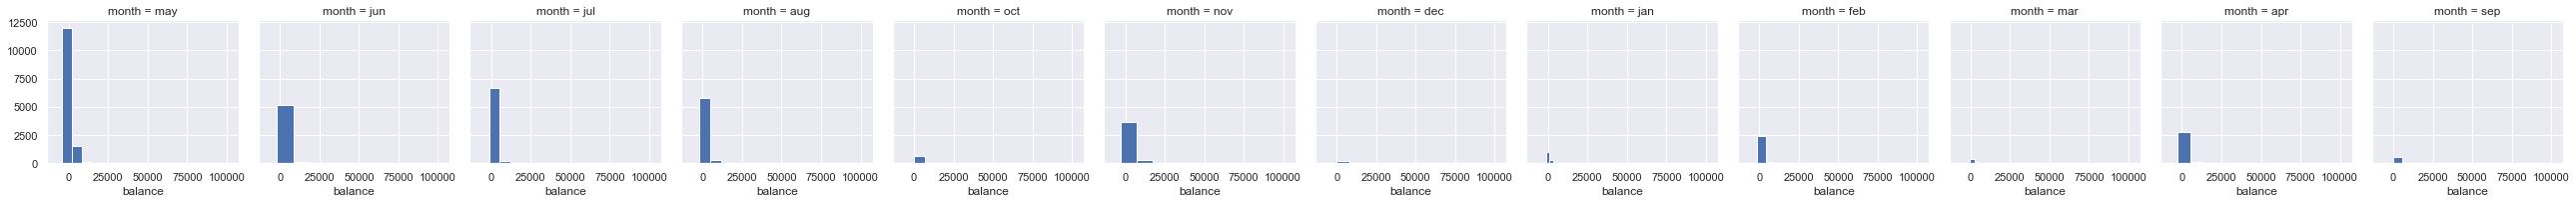

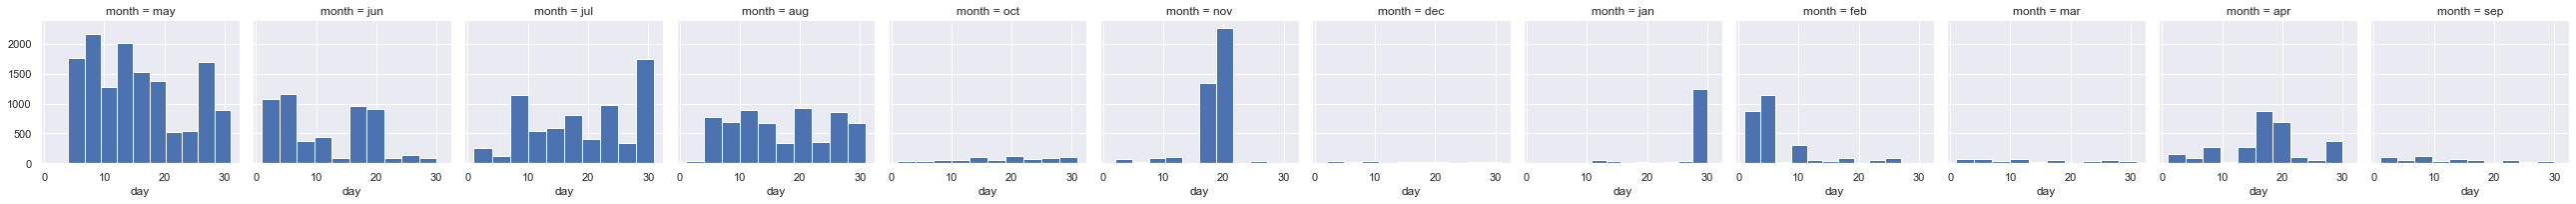

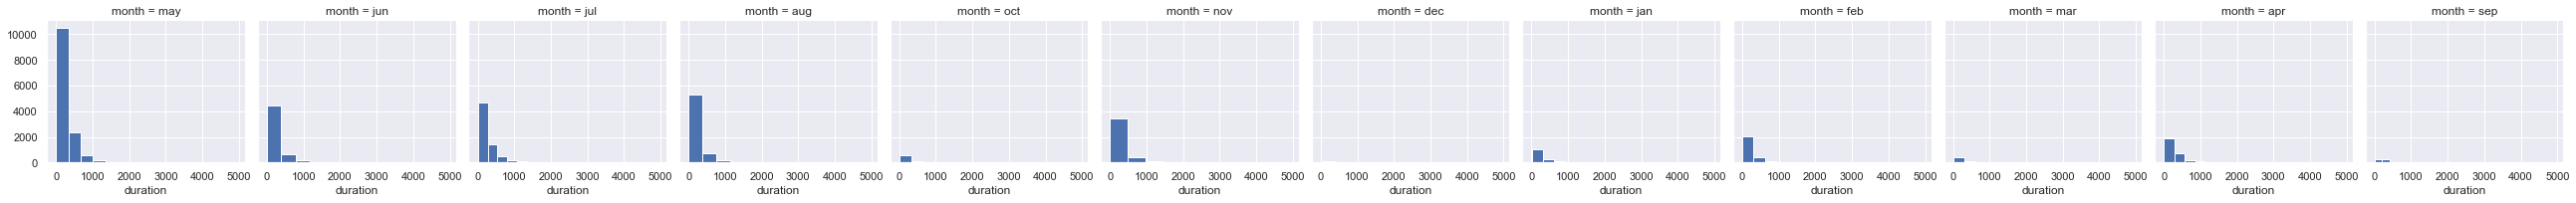

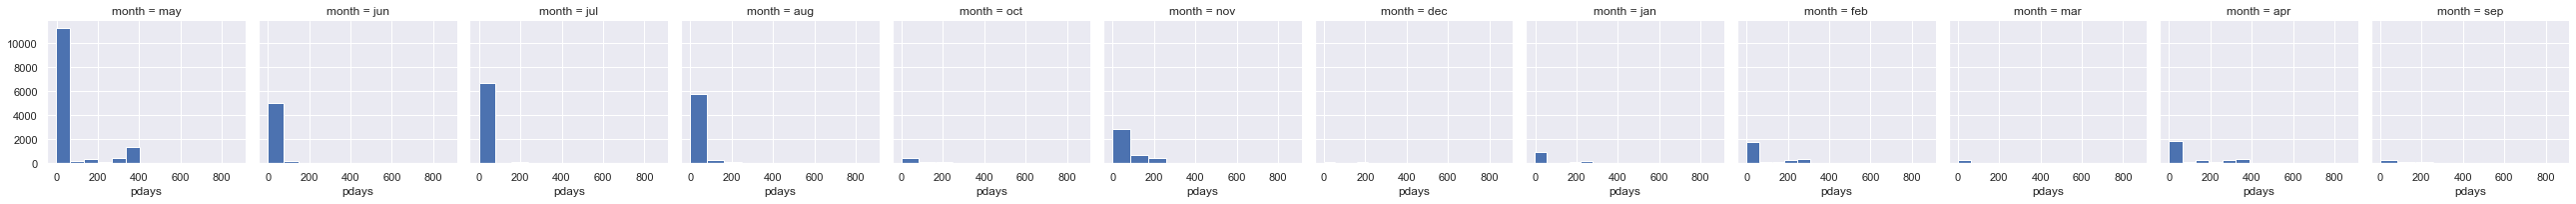

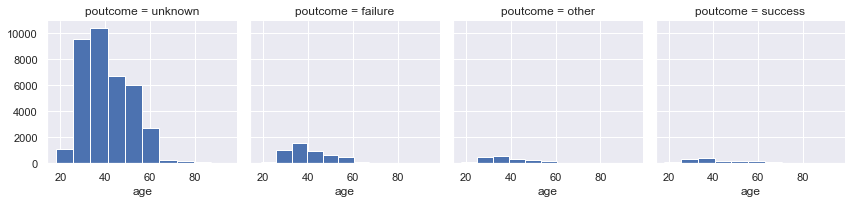

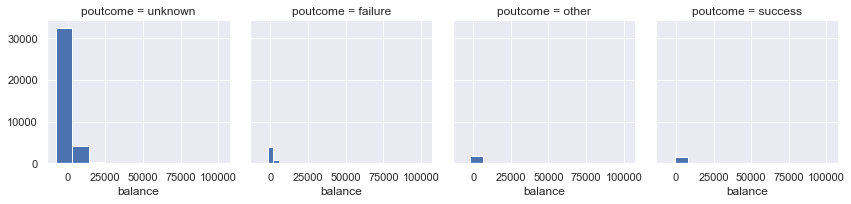

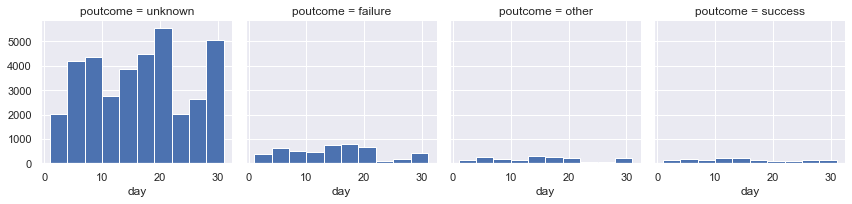

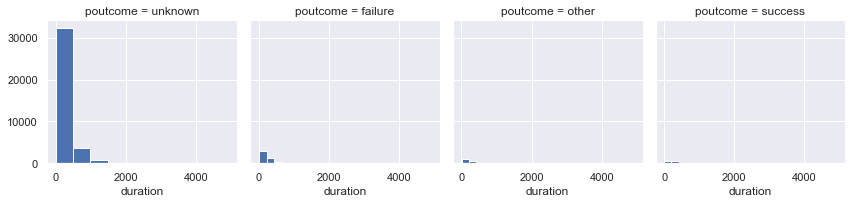

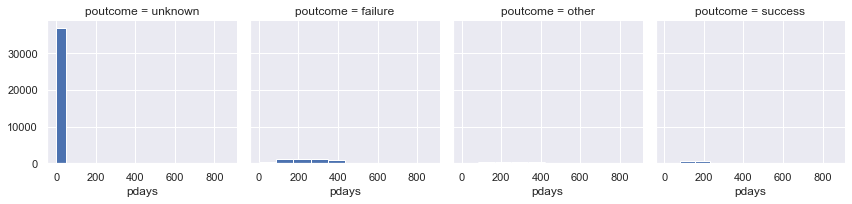

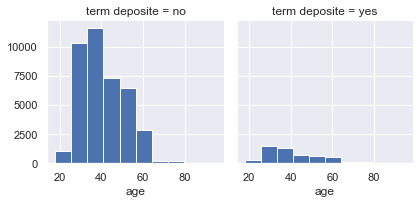

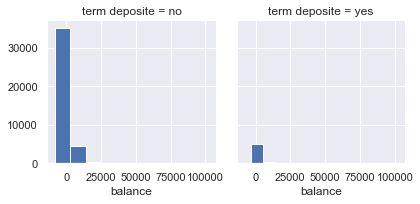

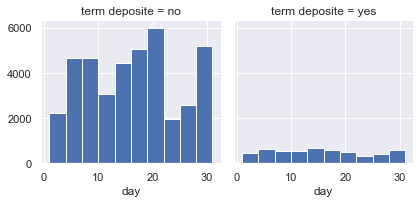

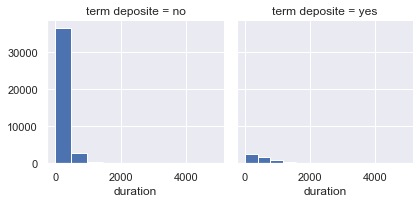

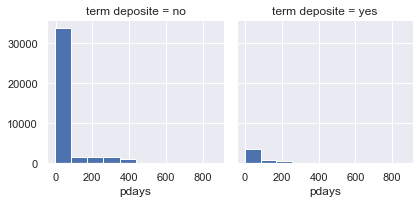

In [213]:
for i in categorical_columns2:
    for j in numerical_columns2_2:
        b = sns.FacetGrid(data = data, col = i)
        b.map(plt.hist, j)
        plt.show()

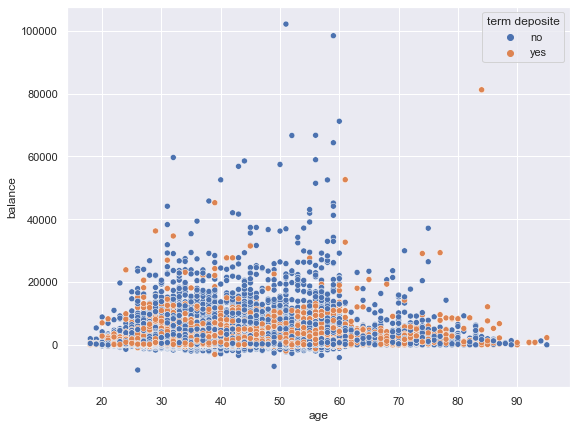

In [214]:
plt.figure(figsize = (9, 7))
sns.scatterplot(data = data, x = 'age', y = 'balance', hue = 'term deposite')
plt.show()

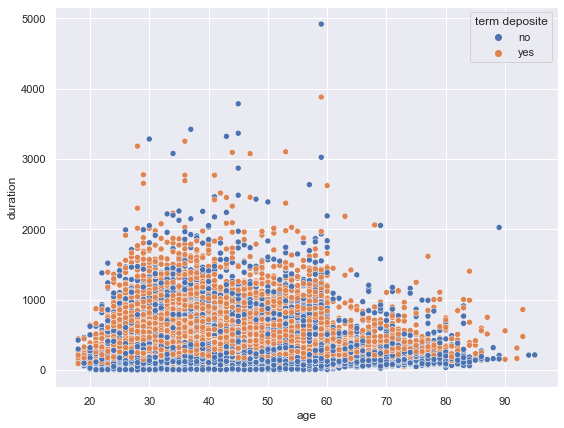

In [215]:
plt.figure(figsize = (9, 7))
sns.scatterplot(data = data, x = 'age', y = 'duration', hue = 'term deposite')
plt.show()

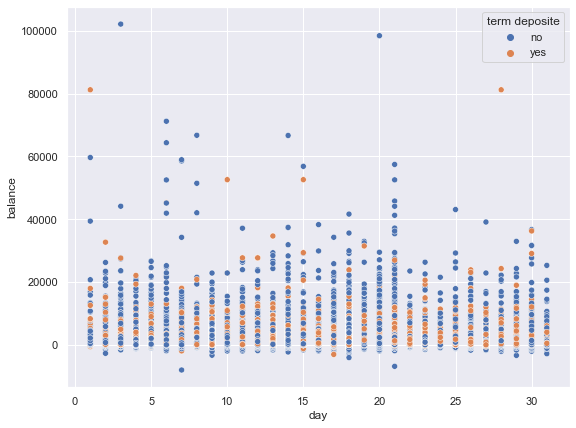

In [216]:
plt.figure(figsize = (9, 7))
sns.scatterplot(data = data, x = 'day', y = 'balance', hue = 'term deposite')
plt.show()

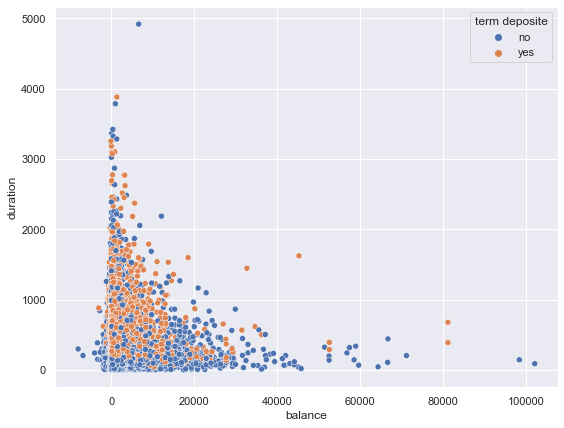

In [217]:
plt.figure(figsize = (9, 7))
sns.scatterplot(data = data, x = 'balance', y = 'duration', hue = 'term deposite')
plt.show()

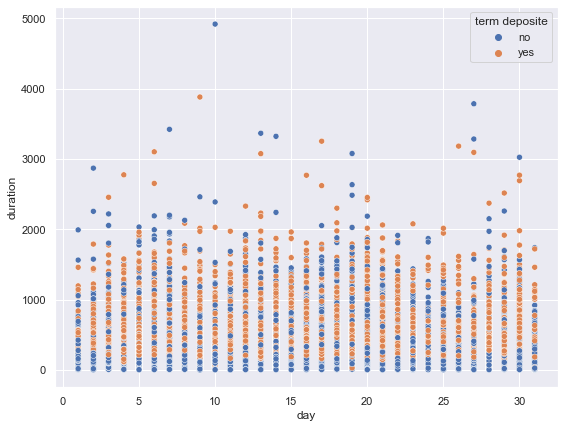

In [218]:
plt.figure(figsize = (9, 7))
sns.scatterplot(data = data, x = 'day', y = 'duration', hue = 'term deposite')
plt.show()

In [219]:
data2 = data.copy()

In [220]:
data2.shape

(45211, 16)

In [221]:
q1_1 = data2['age'].quantile(0.99)
q1_2 = data2['age'].quantile(0.01)
data2 = data2[data2['age'] < q1_1]
data2 = data2[data2['age'] > q1_2]

In [222]:
data2.shape

(44217, 16)

In [223]:
q2_1 = data2['balance'].quantile(0.99)
q2_2 = data2['balance'].quantile(0.01)
data2 = data2[data2['balance'] < q2_1]
data2 = data2[data2['balance'] > q2_2]

In [224]:
data2.shape

(43329, 16)

In [225]:
q3_1 = data['duration'].quantile(0.99)
q3_2 = data['duration'].quantile(0.01)
data2 = data2[data2['duration'] < q3_1]
data2 = data2[data2['duration'] > q3_2]

In [226]:
data2.shape

(42402, 16)

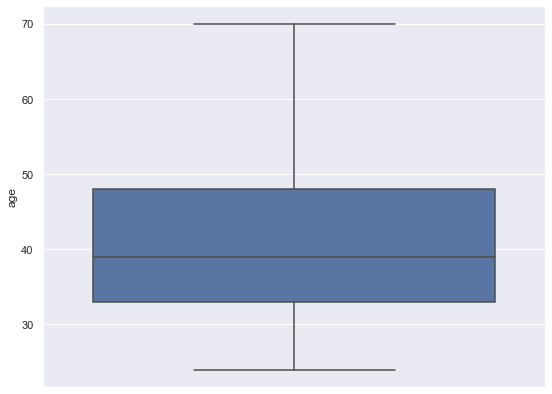

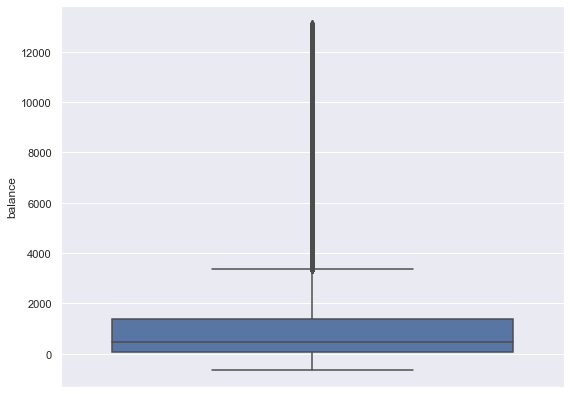

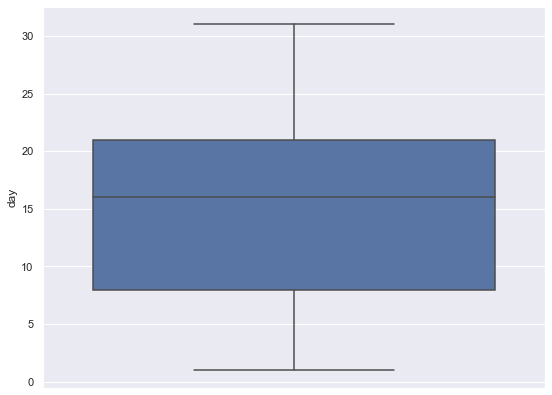

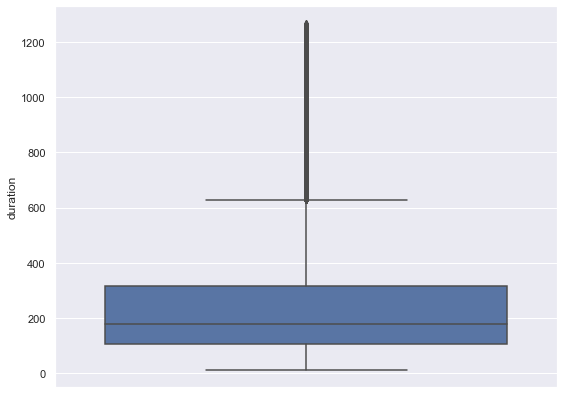

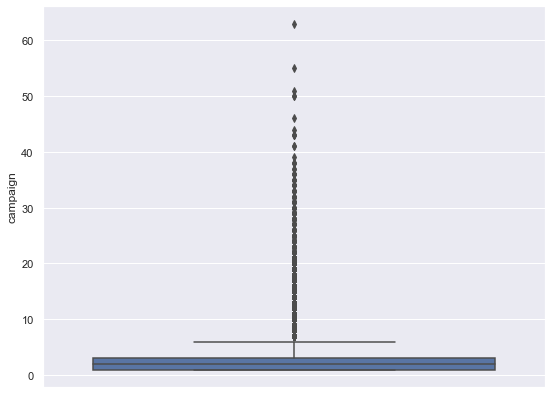

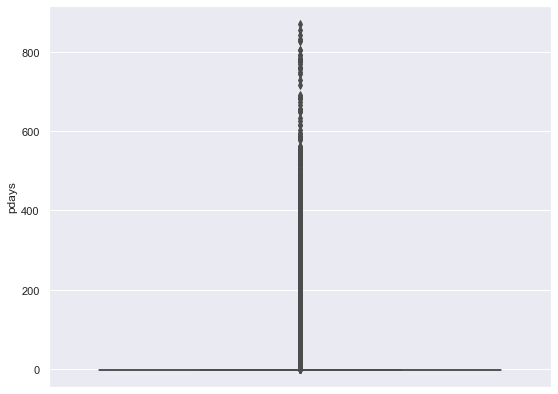

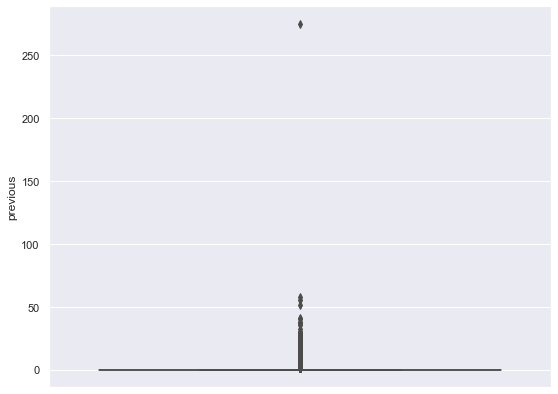

In [227]:
for column in numerical_columns2:
    plt.figure(figsize = (9, 7))
    sns.boxplot(data = data2, y = column)
    plt.show()

In [228]:
data2[data2['balance'] > 3500].shape

(3982, 16)

In [229]:
data2 = data2[data2['balance'] < 3500]

In [230]:
data2[data2['duration'] > 610].shape

(2694, 16)

In [231]:
data2 = data2[data2['duration'] < 610]

In [232]:
data2[data2['campaign'] > 7].shape

(1841, 16)

In [233]:
data2 = data2[data2['campaign'] < 7]

In [234]:
data2[data2['pdays'] > 300].shape

(1985, 16)

In [235]:
data2 = data2[data2['pdays'] < 300]

In [236]:
data2[data2['previous'] > 3].shape

(1237, 16)

In [237]:
data2 = data2[data2['previous'] < 3]

In [238]:
data2.shape

(29460, 16)

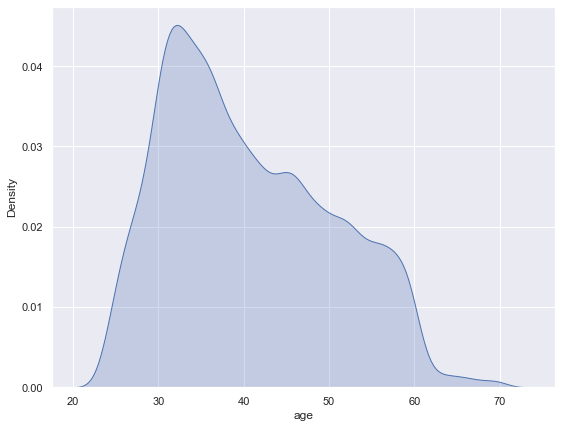

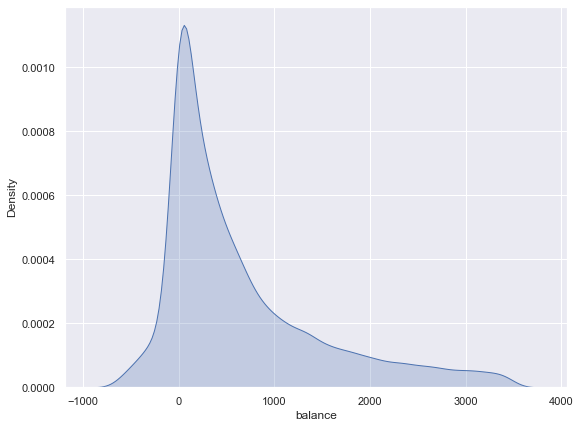

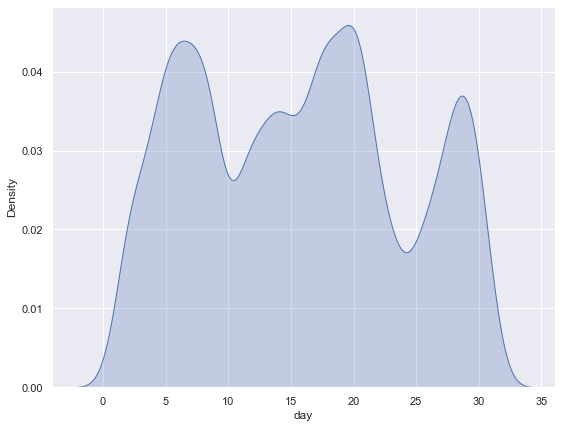

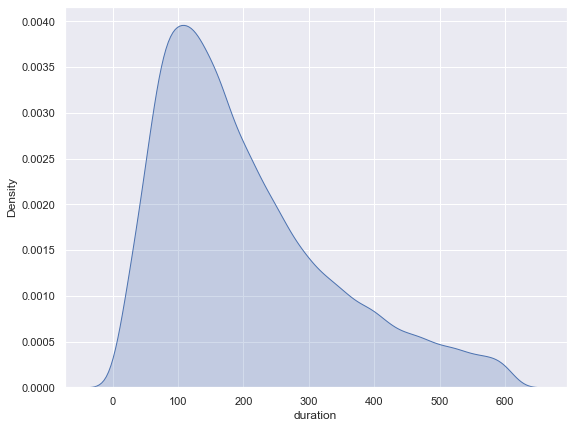

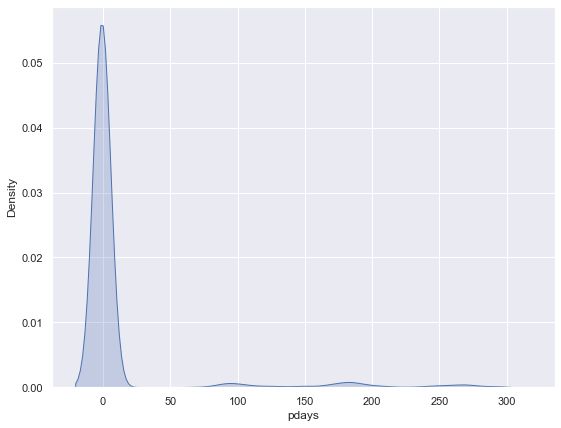

In [239]:
for column in numerical_columns2_2:
    plt.figure(figsize = (9, 7))
    sns.kdeplot(data2[column], shade = True, legend = False)
    plt.show()

In [240]:
data2[data2['age'] > 62].shape

(287, 16)

In [241]:
data2 = data2[data2['age'] < 62]

In [242]:
data2[data2['balance'] > 3000].shape

(676, 16)

In [243]:
data2 = data2[data2['balance'] < 3000]

In [244]:
data2[data2['duration'] > 500].shape

(1171, 16)

In [245]:
data2 = data2[data2['duration'] < 500]

In [246]:
data2[data2['pdays'] > 25].shape

(2102, 16)

In [247]:
data2 = data2[data2['pdays'] < 25]

In [248]:
data2.shape

(25162, 16)

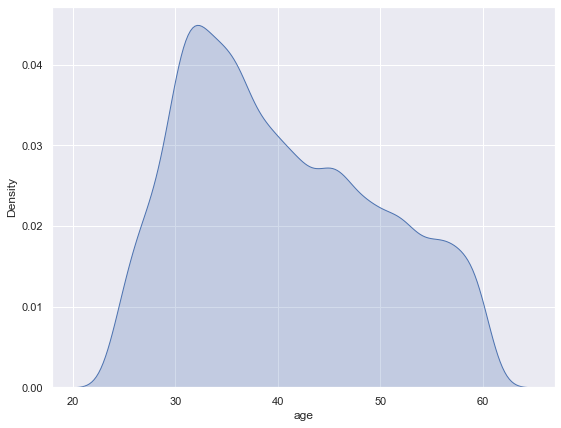

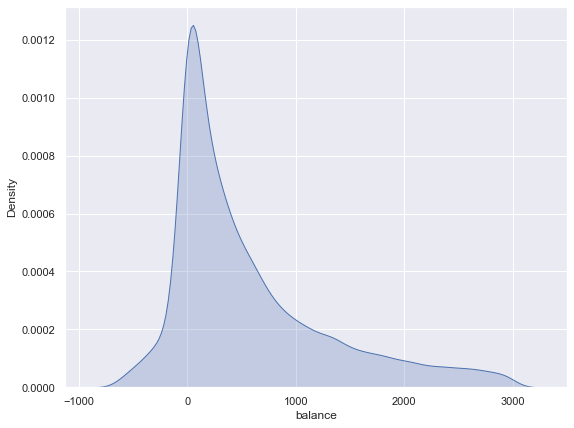

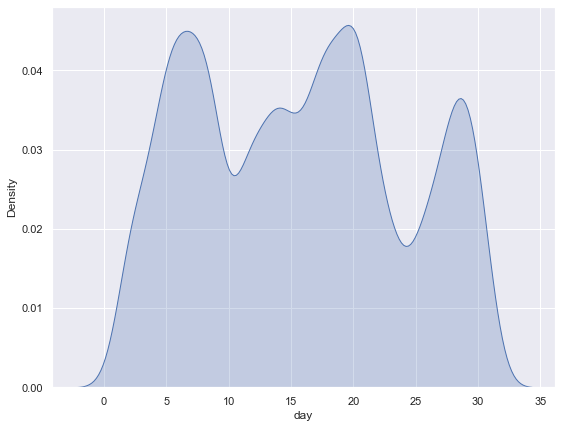

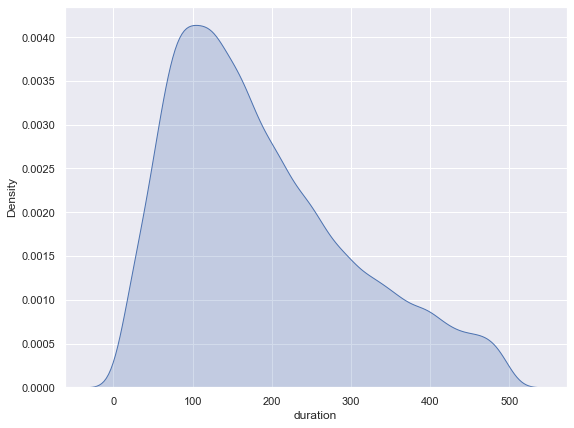

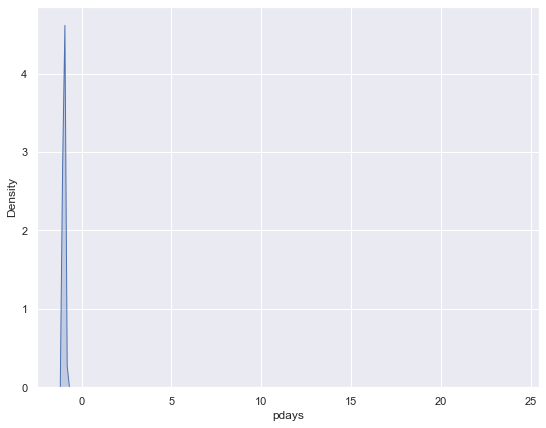

In [249]:
for column in numerical_columns2_2:
    plt.figure(figsize = (9, 7))
    sns.kdeplot(data2[column], shade = True, legend = False)
    plt.show()

In [250]:
data2['pdays'].value_counts()

pdays
-1     25091
 2        17
 8        16
 5         7
 1         6
 12        5
 6         4
 9         4
 24        2
 7         1
 10        1
 15        1
 4         1
 21        1
 13        1
 14        1
 19        1
 22        1
 20        1
Name: count, dtype: int64

In [251]:
data2.drop(columns = ['pdays'], axis = 1, inplace = True)

In [252]:
data2.head()

age           job  marital  education  balance housing loan  contact  day  \
0   58    management  married   tertiary     2143     yes   no  unknown    5   
1   44    technician   single  secondary       29     yes   no  unknown    5   
2   33  entrepreneur  married  secondary        2     yes  yes  unknown    5   
3   47   blue-collar  married    unknown     1506     yes   no  unknown    5   
4   33       unknown   single    unknown        1      no   no  unknown    5   

  month  duration  campaign  previous poutcome term deposite  
0   may       261         1         0  unknown            no  
1   may       151         1         0  unknown            no  
2   may        76         1         0  unknown            no  
3   may        92         1         0  unknown            no  
4   may       198         1         0  unknown            no

In [253]:
data2.shape

(25162, 15)

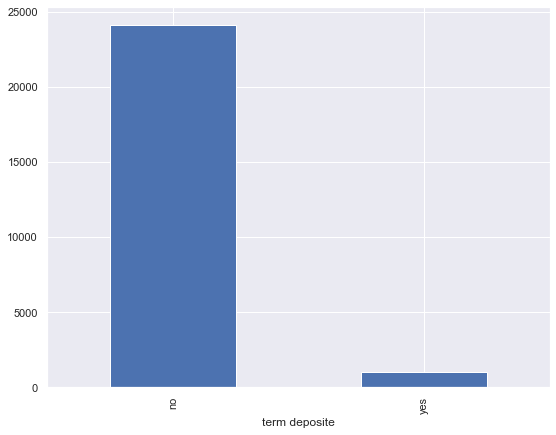

In [254]:
data2['term deposite'].value_counts().plot(kind = 'bar', figsize = (9, 7))
plt.show()

In [255]:
data2['term deposite'].value_counts()

term deposite
no     24118
yes     1044
Name: count, dtype: int64

In [256]:
data2.head()

age           job  marital  education  balance housing loan  contact  day  \
0   58    management  married   tertiary     2143     yes   no  unknown    5   
1   44    technician   single  secondary       29     yes   no  unknown    5   
2   33  entrepreneur  married  secondary        2     yes  yes  unknown    5   
3   47   blue-collar  married    unknown     1506     yes   no  unknown    5   
4   33       unknown   single    unknown        1      no   no  unknown    5   

  month  duration  campaign  previous poutcome term deposite  
0   may       261         1         0  unknown            no  
1   may       151         1         0  unknown            no  
2   may        76         1         0  unknown            no  
3   may        92         1         0  unknown            no  
4   may       198         1         0  unknown            no

In [257]:
for column in data2.columns:
    if data[column].dtype == 'object':
        print(f'{column} : {data[column].value_counts()}')
        print('----------------------------------------------')

job : job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: count, dtype: int64
----------------------------------------------
marital : marital
married     27214
single      12790
divorced     5207
Name: count, dtype: int64
----------------------------------------------
education : education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: count, dtype: int64
----------------------------------------------
housing : housing
yes    25130
no     20081
Name: count, dtype: int64
----------------------------------------------
loan : loan
no     37967
yes     7244
Name: count, dtype: int64
----------------------------------------------
contact : contact
cellular     29285
unknown      13020
telephone     2906
Name: count, dtype: int64
--------

In [258]:
data2 = data2[data2['job'] != 'unknown']

In [259]:
data2.shape

(25003, 15)

In [260]:
smote = SMOTE(sampling_strategy = 'not majority')

In [261]:
data3 = data2.copy()

In [262]:
data3 = pd.get_dummies(data = data3, columns = ['job', 'marital', 'education', 'housing', 'loan', 'contact', 'month',
                                                'poutcome'], drop_first = True, dtype = 'int')

In [263]:
data3.head()

age  balance  day  duration  campaign  previous term deposite  \
0   58     2143    5       261         1         0            no   
1   44       29    5       151         1         0            no   
2   33        2    5        76         1         0            no   
3   47     1506    5        92         1         0            no   
5   35      231    5       139         1         0            no   

   job_blue-collar  job_entrepreneur  job_housemaid  ...  month_jul  \
0                0                 0              0  ...          0   
1                0                 0              0  ...          0   
2                0                 1              0  ...          0   
3                1                 0              0  ...          0   
5                0                 0              0  ...          0   

   month_jun  month_mar  month_may  month_nov  month_oct  month_sep  \
0          0          0          1          0          0          0   
1          0          0          1          0          0          0   
2          0          0          1          0          0          0   
3          0          0          1          0          0          0   
5          0          0          1          0          0          0   

   poutcome_other  poutcome_success  poutcome_unknown  
0               0                 0                 1  
1               0                 0                 1  
2               0                 0                 1  
3               0                 0                 1  
5               0                 0                 1  

[5 rows x 40 columns]

In [264]:
data3.shape

(25003, 40)

In [265]:
data3.columns

Index(['age', 'balance', 'day', 'duration', 'campaign', 'previous',
       'term deposite', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_married',
       'marital_single', 'education_secondary', 'education_tertiary',
       'education_unknown', 'housing_yes', 'loan_yes', 'contact_telephone',
       'contact_unknown', 'month_aug', 'month_dec', 'month_feb', 'month_jan',
       'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov',
       'month_oct', 'month_sep', 'poutcome_other', 'poutcome_success',
       'poutcome_unknown'],
      dtype='object')

In [266]:
le = LabelEncoder()
data3['term deposite'] = le.fit_transform(data3['term deposite'])

In [267]:
X = data3.drop(columns = ['term deposite'])
y = data3['term deposite']

In [268]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [269]:
X_sm, y_sm = smote.fit_resample(X_scaled, y)

In [270]:
len(X_sm)

47932

In [271]:
X_train, X_test, y_train, y_test = train_test_split(X_sm, y_sm, test_size = 0.2, stratify = y_sm, shuffle = True,
                                                   random_state = 101)

In [272]:
X_train.shape

(38345, 39)

In [273]:
X_test.shape

(9587, 39)

In [274]:
y_train.value_counts()

term deposite
0    19173
1    19172
Name: count, dtype: int64

In [275]:
y_test.value_counts()

term deposite
1    4794
0    4793
Name: count, dtype: int64

In [276]:
model1 = LogisticRegression()

In [281]:
cvs1 = cross_val_score(model1, X_train, y_train, cv = 5)
print('Validation Accuracy for Logistic Regression model is:', round(cvs1.mean(), 2))

Validation Accuracy for Logistic Regression model is: 0.85


In [282]:
model1.fit(X_train, y_train)

LogisticRegression()

In [283]:
y_pred1 = model1.predict(X_test)

In [285]:
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.86      0.83      0.84      4793
           1       0.83      0.86      0.85      4794

    accuracy                           0.84      9587
   macro avg       0.85      0.84      0.84      9587
weighted avg       0.85      0.84      0.84      9587



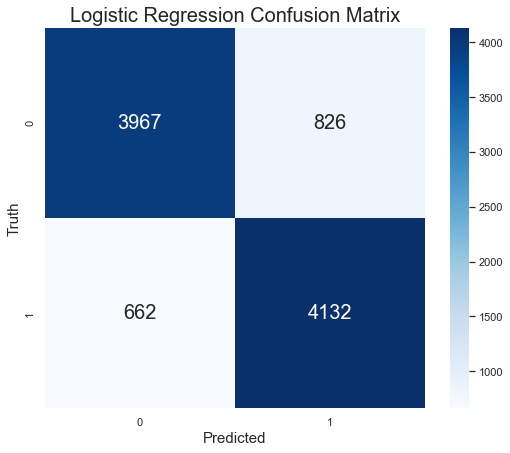

In [288]:
plt.figure(figsize = (9, 7))
sns.heatmap(confusion_matrix(y_test, y_pred1), annot = True, square = True, cbar = True, annot_kws = {'size' : 20}, fmt = 'd',
           cmap = 'Blues')
plt.title('Logistic Regression Confusion Matrix', fontsize = 20)
plt.xlabel('Predicted', fontsize = 15)
plt.ylabel('Truth', fontsize = 15)
plt.show()

In [291]:
model2 = RandomForestClassifier()

In [292]:
cvs2 = cross_val_score(model2, X_train, y_train, cv = 5)
print('Validation accuracy for Random Forest Classifier model is:', round(cvs2.mean(), 2))

Validation accuracy for Random Forest Classifier model is: 0.98


In [294]:
model2.fit(X_train, y_train)

RandomForestClassifier()

In [295]:
y_pred2 = model2.predict(X_test)

In [296]:
print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       0.99      0.98      0.98      4793
           1       0.98      0.99      0.99      4794

    accuracy                           0.98      9587
   macro avg       0.98      0.98      0.98      9587
weighted avg       0.98      0.98      0.98      9587



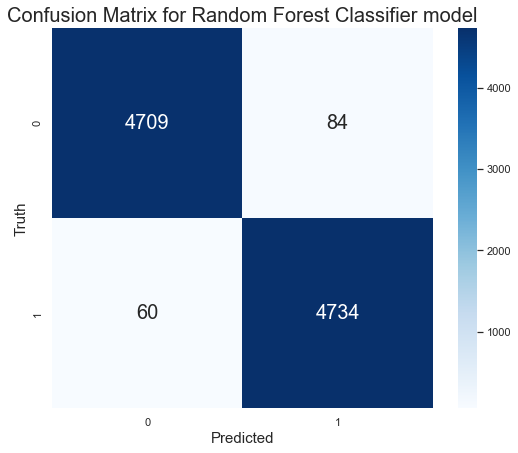

In [297]:
plt.figure(figsize = (9, 7))
sns.heatmap(confusion_matrix(y_test, y_pred2), annot = True, square = True, cbar = True, annot_kws = {'size' : 20}, fmt = 'd',
           cmap = 'Blues')
plt.title('Confusion Matrix for Random Forest Classifier model', fontsize = 20)
plt.xlabel('Predicted', fontsize = 15)
plt.ylabel('Truth', fontsize = 15)
plt.show()